<a href="https://colab.research.google.com/github/TeaLeafs04/ML15_Project/blob/main/AirBnB_OLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Render Dataset and Eliminate Redundant Features

In [ ]:
df = pd.read_csv("train1.csv")  # Load Data
df = df[df[['Unnamed: 27', 'Unnamed: 28']].isna().all(axis=1)].copy() # Drop rows where 'Unnamed: 27' or 'Unnamed: 28' have non-NaN values
df.drop(["Unnamed: 27", "Unnamed: 28", "id", "thumbnail_url", "name"], axis=1, inplace=True) # Drop specified columns
df.drop_duplicates(inplace=True) # Drop duplicates
df.reset_index(drop=True, inplace=True) # Reset index
df['raw_price'] = np.exp(df['log_price'])
df # Display the DataFrame

log_price property_type        room_type  accommodates  bathrooms  \
0       4.442651     Apartment  Entire home/apt             2        1.0   
1       5.703782         House  Entire home/apt             4        1.5   
2       5.298317     Apartment  Entire home/apt             3        1.0   
3       4.941642     Apartment  Entire home/apt             5        1.0   
4       4.174387         House     Private room             2        2.0   
...          ...           ...              ...           ...        ...   
57375   3.367296          Dorm     Private room             2        2.0   
57376   4.624973     Apartment     Private room             3        1.0   
57377   4.905275     Apartment  Entire home/apt             2        1.0   
57378   5.135798     Apartment  Entire home/apt             2        1.0   
57379   4.605170         House     Private room             2        1.0   

       bed_type cancellation_policy  cleaning_fee    city first_review  ...  \
0      Real Bed              strict          True     NYC   2015-07-04  ...   
1      Real Bed              strict          True      LA   2016-06-27  ...   
2      Real Bed            flexible          True      LA          NaN  ...   
3      Real Bed              strict          True     NYC   2016-03-29  ...   
4      Real Bed              strict          True     NYC   2014-12-14  ...   
...         ...                 ...           ...     ...          ...  ...   
57375  Real Bed            moderate          True      LA          NaN  ...   
57376  Real Bed            flexible          True     NYC   2017-08-10  ...   
57377  Real Bed              strict          True  Boston   2013-09-07  ...   
57378  Real Bed            moderate          True  Boston   2017-04-16  ...   
57379  Real Bed            flexible         False      LA          NaN  ...   

      last_review   latitude   longitude       neighbourhood  \
0      2015-09-08  40.741473  -73.919972           Sunnyside   
1      2016-10-23  33.343624 -118.330799                 NaN   
2             NaN  34.099849 -118.361020                 NaN   
3      2017-09-20  40.698671  -73.911344            Bushwick   
4      2017-09-18  40.694950  -73.950264  Bedford-Stuyvesant   
...           ...        ...         ...                 ...   
57375         NaN  33.970464 -118.350144           Inglewood   
57376  2017-09-06  40.765034  -73.988267      Hell's Kitchen   
57377  2017-10-01  42.367960  -71.055729           North End   
57378  2017-06-08  42.350678  -71.086642            Back Bay   
57379         NaN  33.749455 -118.125752                 NaN   

      number_of_reviews review_scores_rating  zipcode  bedrooms beds raw_price  
0                     2                   90    11104         0  2.0      85.0  
1                     4                  100    90704         1  1.0     300.0  
2                     0                   -1    90046         1  2.0     200.0  
3                    24                  100    11237         2  2.0     140.0  
4                   121                   87    11206         1  1.0      65.0  
...                 ...                  ...      ...       ...  ...       ...  
57375                 0                   -1    90302         1  1.0      29.0  
57376                 5                  100    10019         1  2.0     102.0  
57377               323                   88     2113         1  1.0     135.0  
57378                13                  100     2115         0  1.0     170.0  
57379                 0                   -1    90803         1  1.0     100.0  

[57380 rows x 25 columns]

In [ ]:
df['bathrooms'] = df['bathrooms'].fillna(0)
df['bedrooms'] = df['bedrooms'].fillna(0)
df.dropna(subset=["host_has_profile_pic", "host_identity_verified", "host_since", "number_of_reviews", "review_scores_rating", "beds"], axis=0, inplace=True)

# Fill in Missing Zipcodes and obtain missing neighbourhood values

In [ ]:
pip install uszipcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6942 sha256=a7f957b089f243d653bf83ce10ed5d28ae697b75a59d040b8091682e7c1deeee
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.

In [ ]:
from uszipcode import SearchEngine

search = SearchEngine()
def get_zipcode(lat, lon):
    if (lat, lon) in coords_cache:
        return coords_cache[(lat, lon)]

    result = search.by_coordinates(lat=lat, lng=lon, returns=1)
    zipcode = result[0].zipcode if result else None

    coords_cache[(lat, lon)] = zipcode
    return zipcode
# Cache for storing coordinates and zipcodes
coords_cache = {}
# Apply the function to rows with missing zip codes
for index, row in df[df['zipcode'].isna()].iterrows():
    df.at[index, 'zipcode'] = get_zipcode(row['latitude'], row['longitude'])

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
# Find the most frequent neighbourhood for each zipcode
zipcode_to_neighbourhood = df.groupby('zipcode')['neighbourhood'].agg(pd.Series.mode).to_dict()

# Fill in missing neighbourhoods
for index, row in df.iterrows():
    if pd.isna(row['neighbourhood']) and row['zipcode'] in zipcode_to_neighbourhood:
        df.at[index, 'neighbourhood'] = zipcode_to_neighbourhood[row['zipcode']]

In [ ]:
# Calculate the count of listings per neighbourhood
neighbourhood_counts = df['neighbourhood'].value_counts()

# Find neighbourhoods with fewer than 2 listings
neighbourhoods_to_remove = neighbourhood_counts[neighbourhood_counts < 2].index

# Filter out samples with those neighbourhoods
df = df[~df['neighbourhood'].isin(neighbourhoods_to_remove)].copy()

Check NaN Values

In [ ]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15703
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        16015
host_since                    0
instant_bookable              0
last_review               15680
latitude                      0
longitude                     0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
zipcode                       0
bedrooms                      0
beds                          0
raw_price                     0
dtype: int64

# Investigate Relationship with City

In [ ]:
city_dict = {}
for city in list(df.city.unique()):
  city_dict[city] = df[df.city==city]

Visualise Correlation of each city

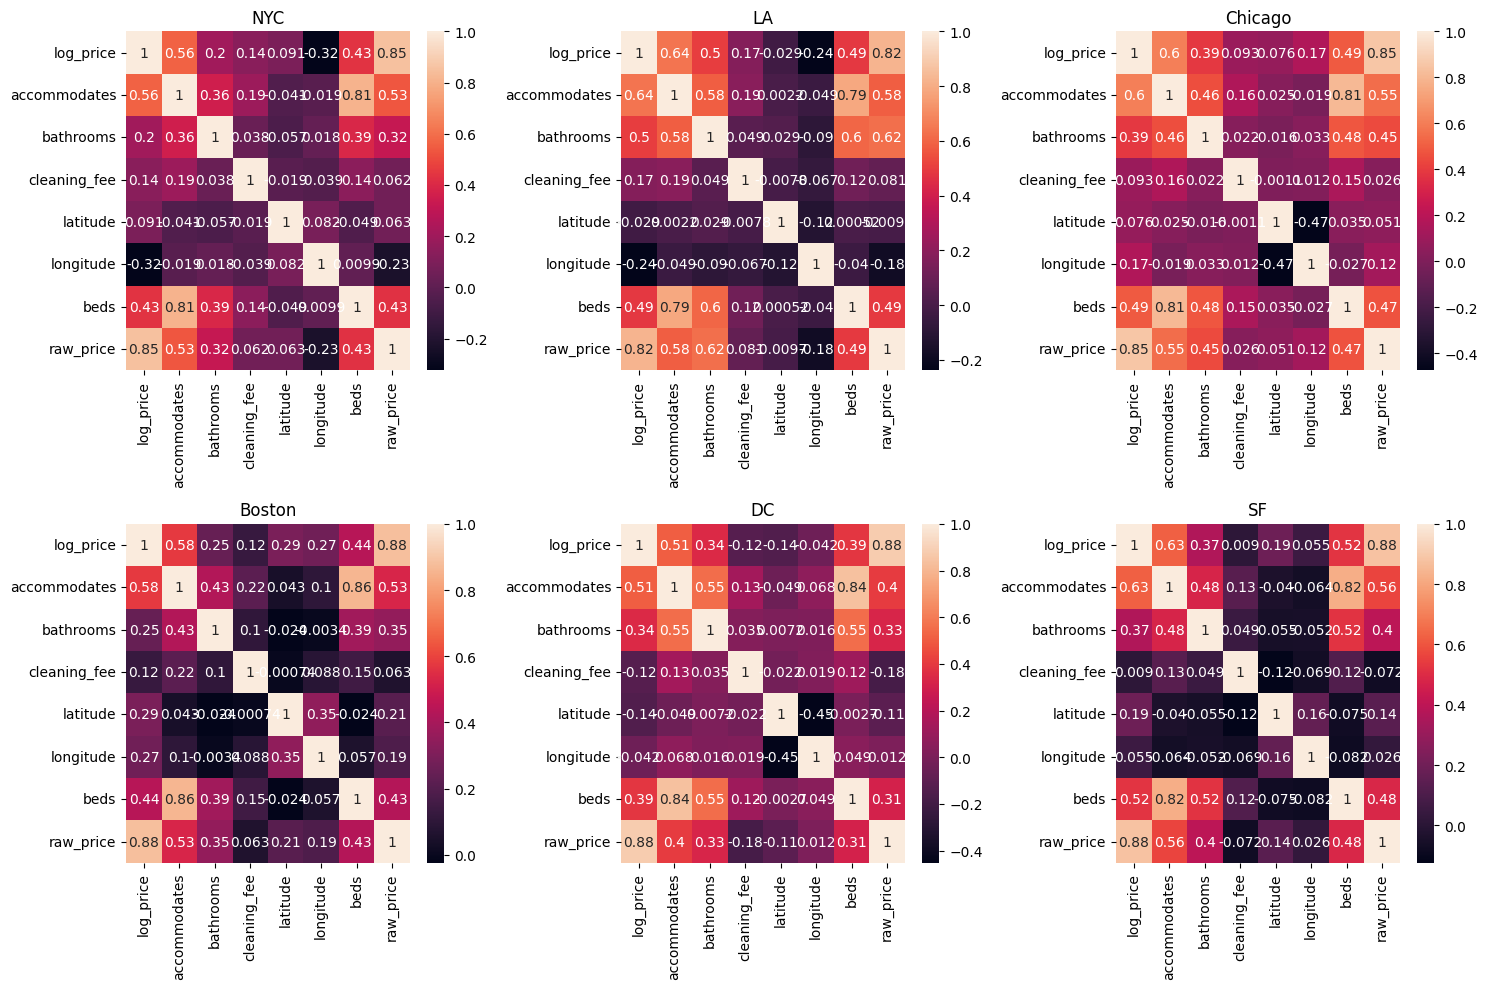

In [ ]:
unique_cities = list(df.city.unique())
num_cities = len(unique_cities)

nrows = 2
ncols = min(num_cities, 3)

plt.figure(figsize=(5 * ncols, 5 * nrows))

for i, city in enumerate(unique_cities, 1):
    plt.subplot(nrows, ncols, i)
    sns.heatmap(city_dict[city].corr(), annot=True)
    plt.title(city)

plt.tight_layout()
plt.show()


Visualise distribution with histogram and boxplot

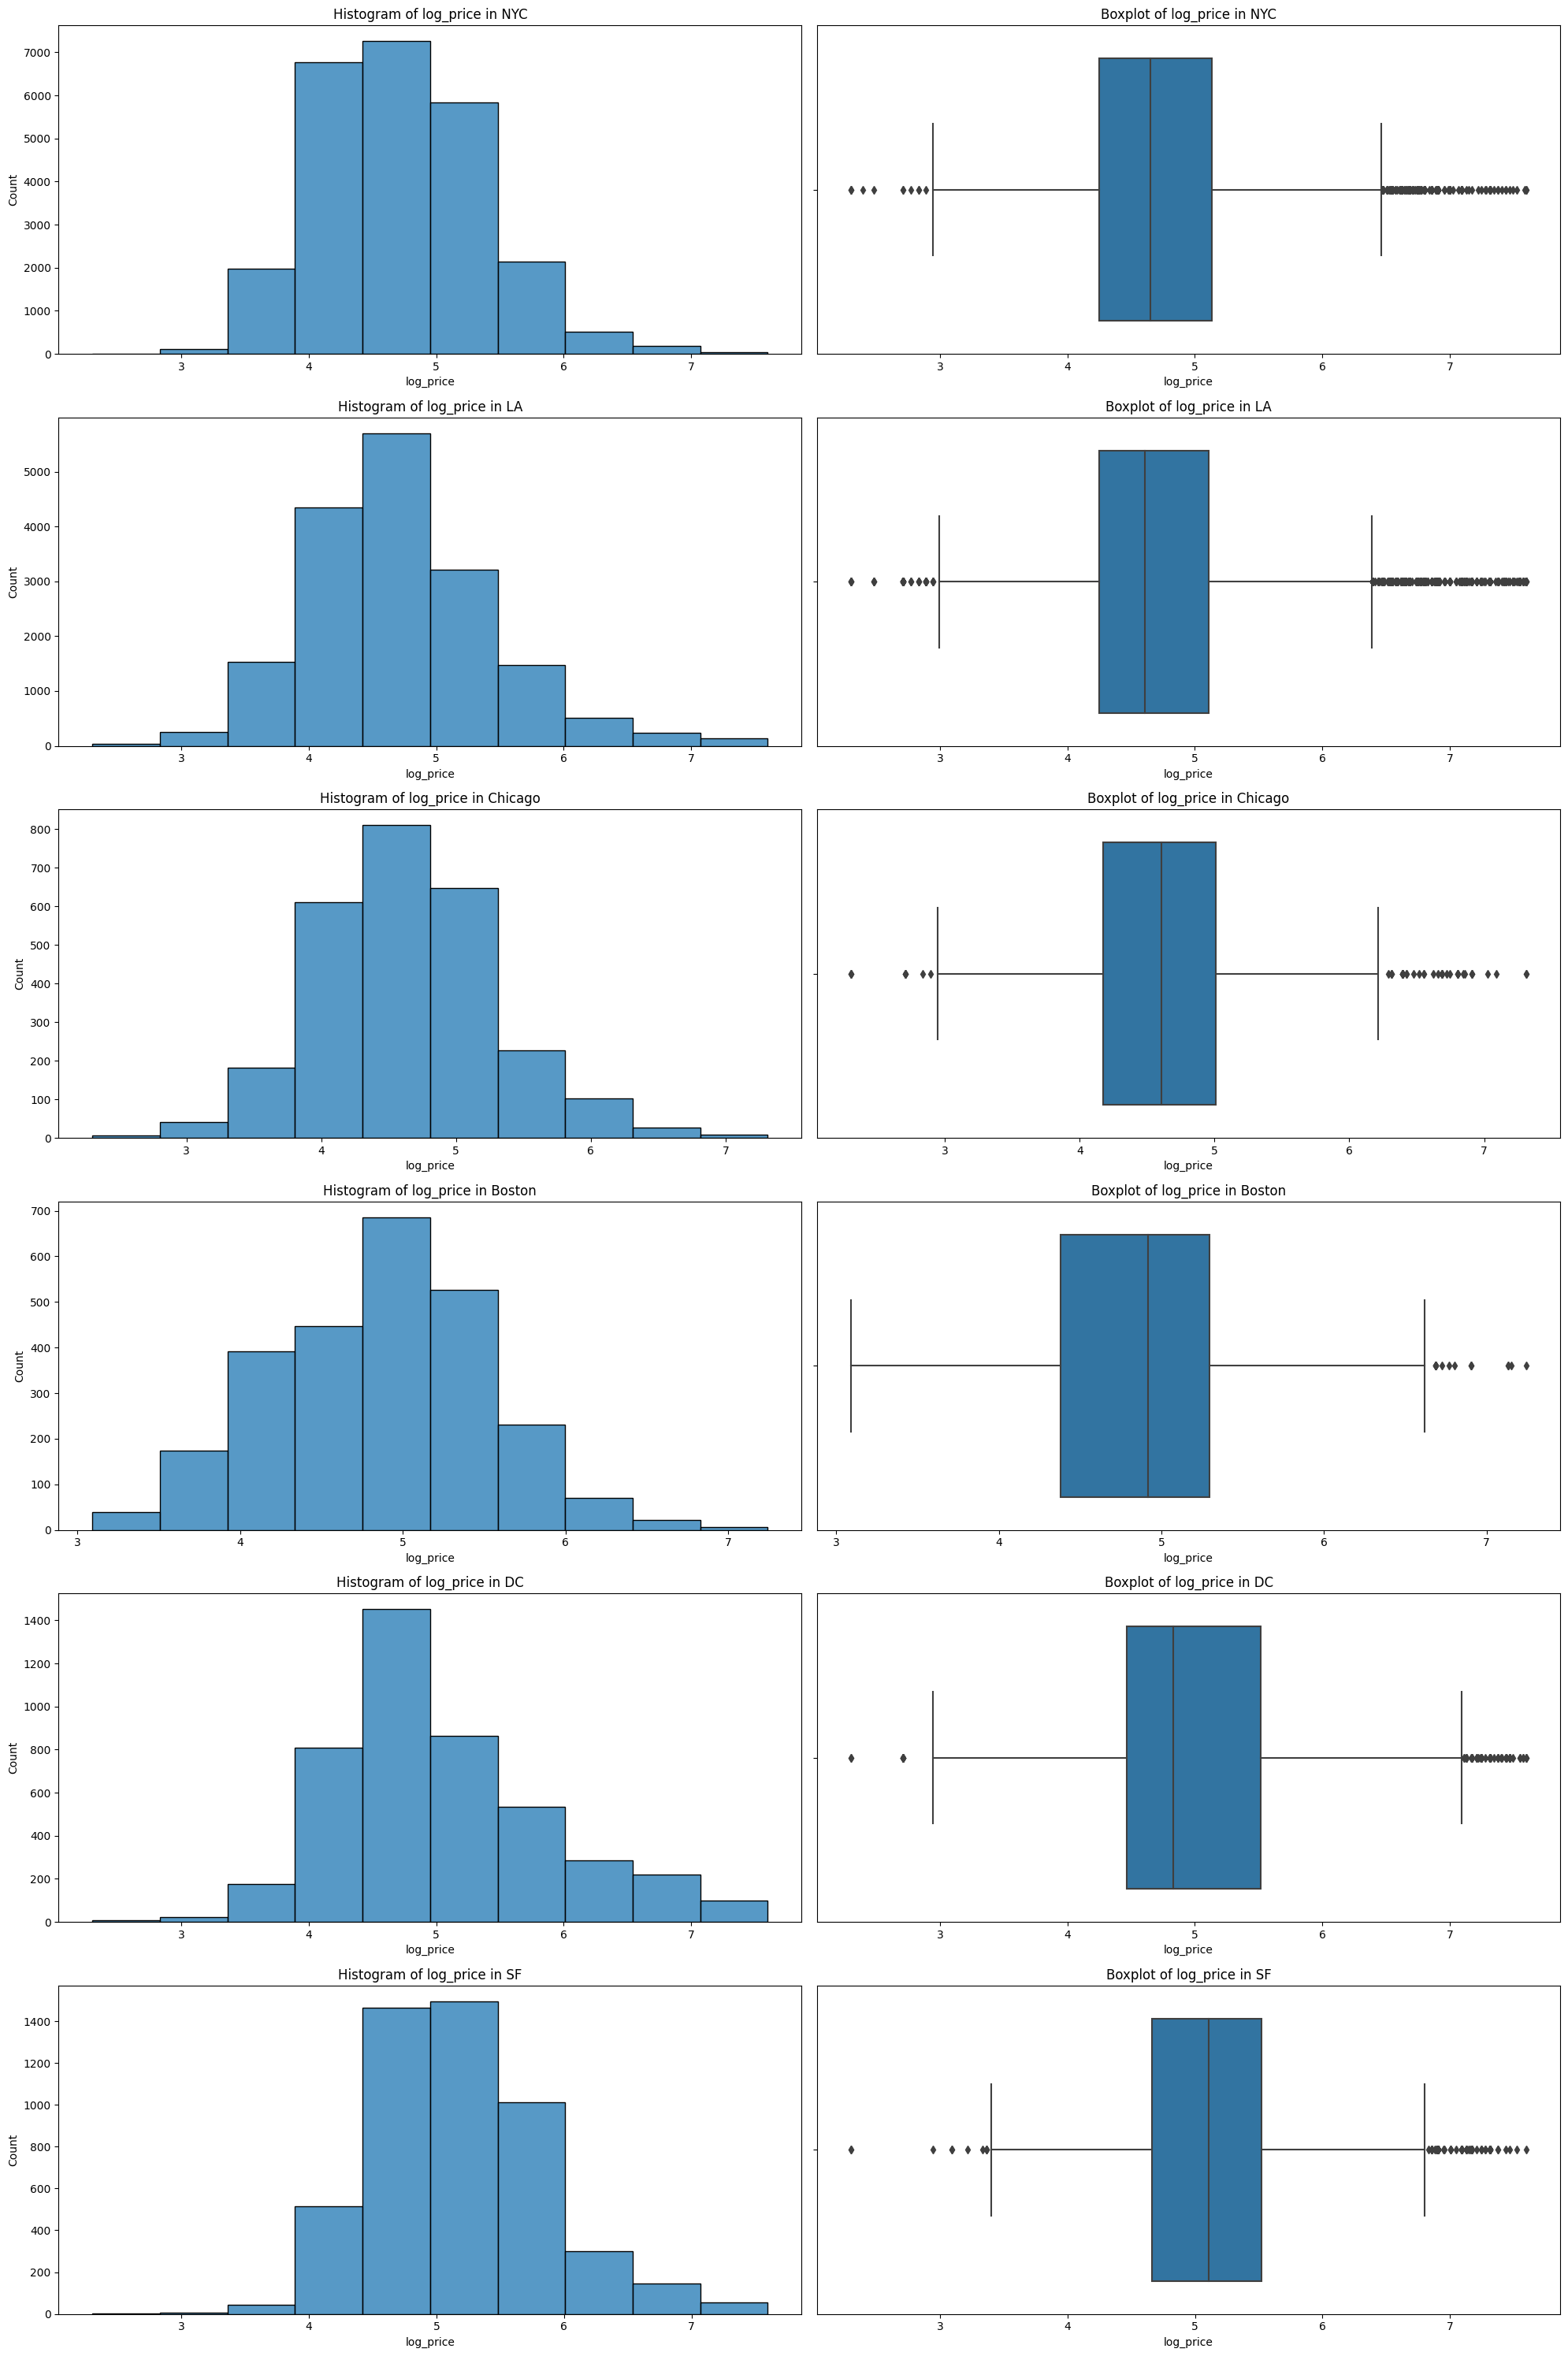

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_cities = list(city_dict.keys())
num_cities = len(unique_cities)


nrows = num_cities
ncols = 2

plt.figure(figsize=(10 * ncols, 5 * nrows))

for i, city in enumerate(unique_cities):
    # Histogram
    plt.subplot(nrows, ncols, 2*i+1)  # Odd numbered subplot
    sns.histplot(city_dict[city].log_price, bins=10)
    plt.title(f"Histogram of log_price in {city}")

    # Boxplot
    plt.subplot(nrows, ncols, 2*i+2)  # Even numbered subplot
    sns.boxplot(x=city_dict[city]['log_price'])
    plt.title(f"Boxplot of log_price in {city}")

plt.tight_layout()
plt.show()


# Investigate the price over time for each city for Apartments

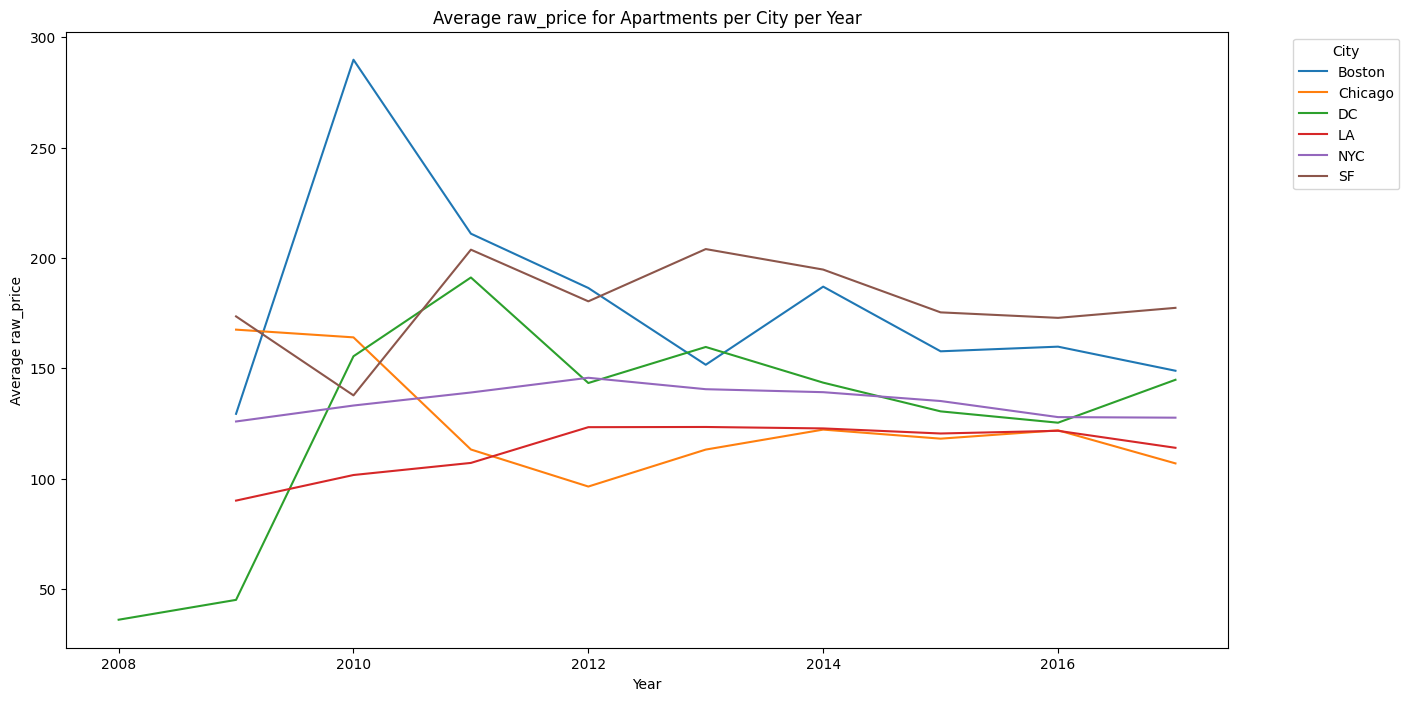

In [ ]:
# Convert 'first_review' to datetime format and extract the year
df['first_review_year'] = pd.to_datetime(df['first_review']).dt.year

# Filter for listings that are categorized as 'Apartment'
apartment_df = df[df['property_type'] == 'Apartment']

# Group by city and year for Apartments, then calculate the mean raw_price
avg_price_per_city_year_apartment = apartment_df.groupby(['city', 'first_review_year'])['raw_price'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='first_review_year', y='raw_price', hue='city', data=avg_price_per_city_year_apartment)
plt.title('Average raw_price for Apartments per City per Year')
plt.xlabel('Year')
plt.ylabel('Average raw_price')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Visualise Distribution of Prices Across Time

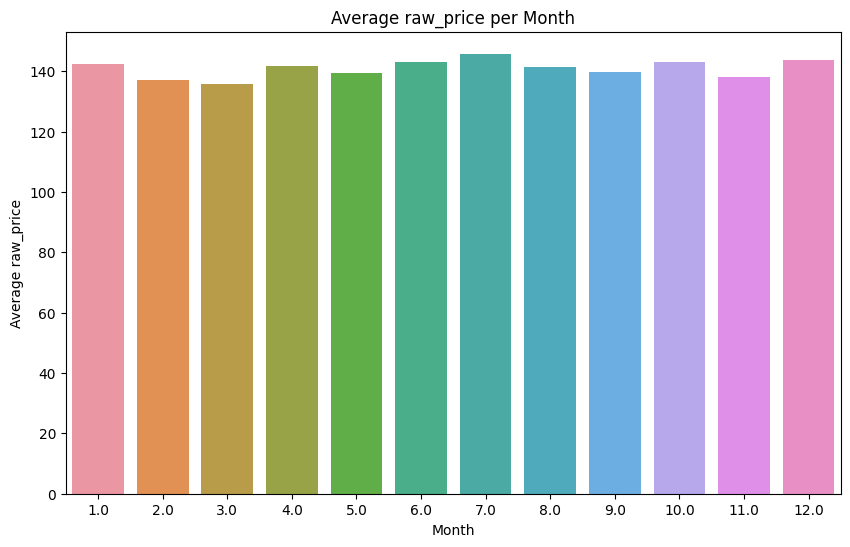

In [ ]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')  # Coerce to handle invalid dates
df['month'] = df['first_review'].dt.month
# Group by month and calculate the average price
avg_price_per_month = df.groupby('month')['raw_price'].mean().reset_index()
# Group by month and count frequencies
frequency_per_month = df.groupby('month').size().reset_index(name='count')


plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='raw_price', data=avg_price_per_month)
plt.title('Average raw_price per Month')
plt.xlabel('Month')
plt.ylabel('Average raw_price')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=frequency_per_month)
plt.title('Frequency of Listings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


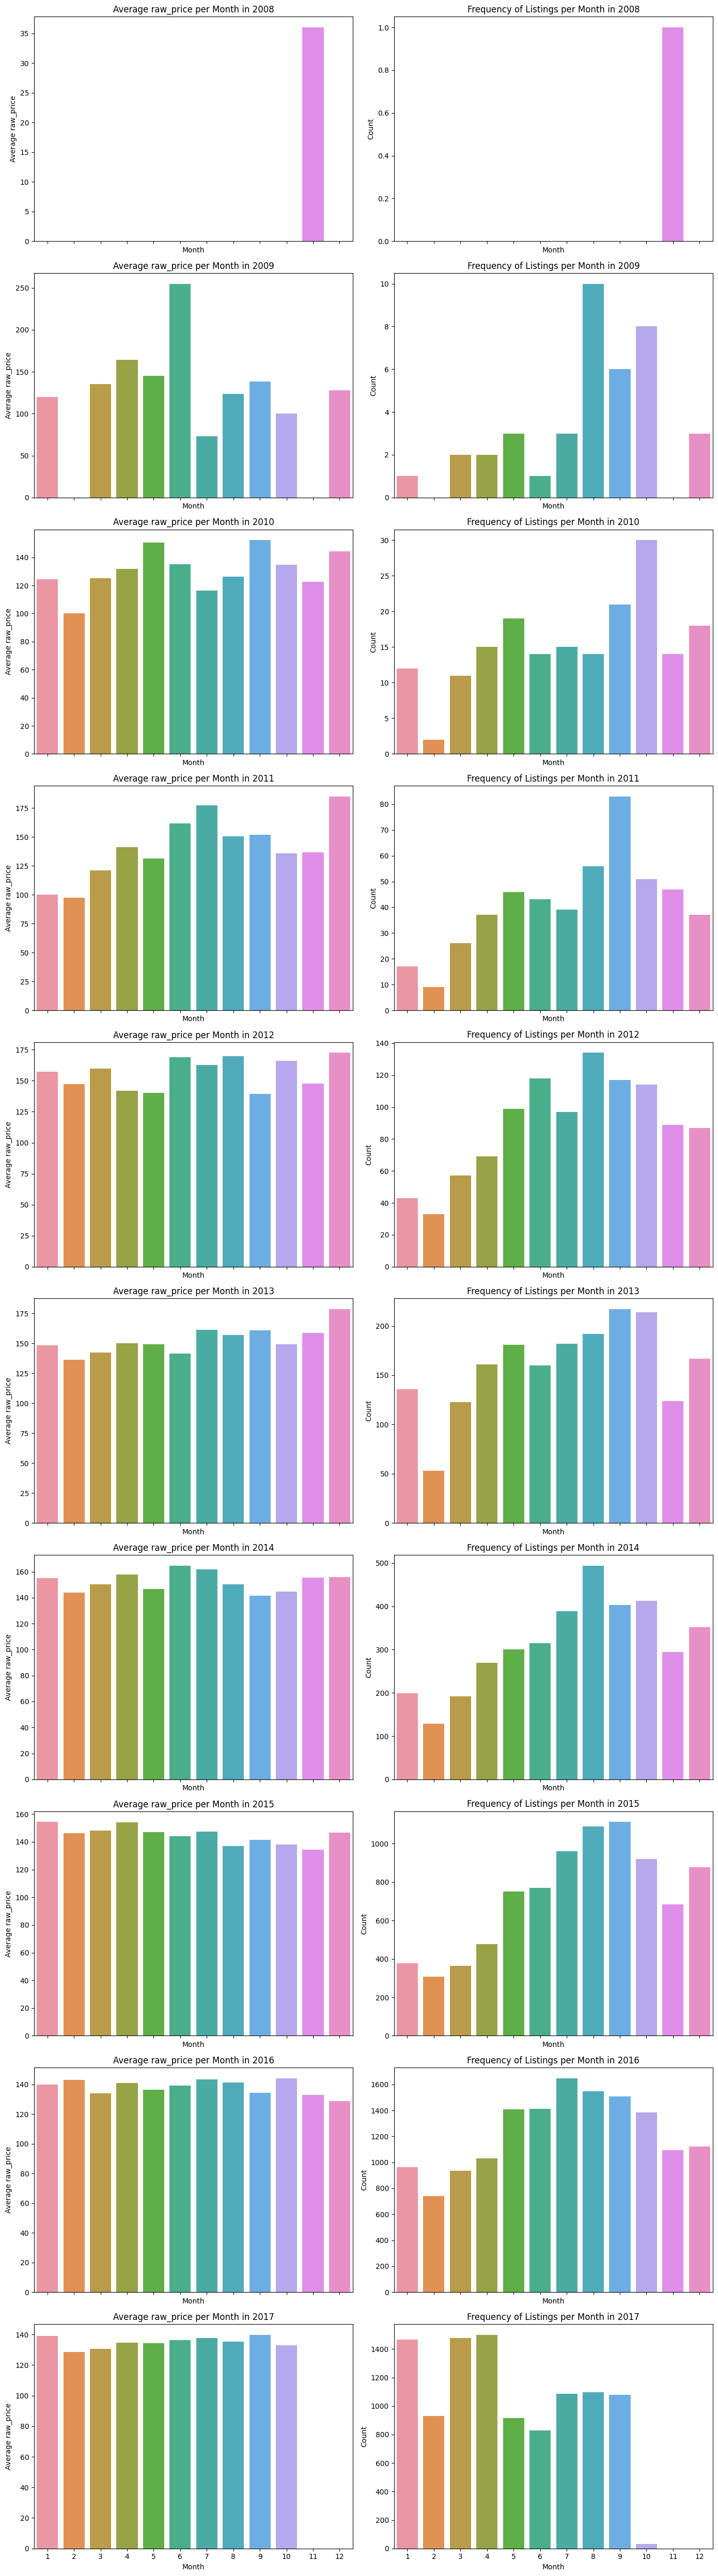

In [ ]:
# Convert 'first_review' to datetime and extract year and month
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['year'] = df['first_review'].dt.year
df['month'] = df['first_review'].dt.month

# Drop rows with missing values for 'year' or 'month' after coercion
df = df.dropna(subset=['year', 'month'])

# Ensure 'year' and 'month' are integers for grouping
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Group by year and month and calculate the average price
avg_price_per_year_month = df.groupby(['year', 'month'])['raw_price'].mean().unstack()

# Group by year and month and count frequencies
frequency_per_year_month = df.groupby(['year', 'month']).size().unstack().fillna(0)

# Plotting
unique_years = sorted(df['year'].unique())
num_years = len(unique_years)

# Set up the matplotlib figure
fig, axes = plt.subplots(num_years, 2, figsize=(14, 5 * num_years), sharex='col')

for i, year in enumerate(unique_years):
    # Average Price Plot
    sns.barplot(ax=axes[i, 0], x=avg_price_per_year_month.columns, y=avg_price_per_year_month.loc[year])
    axes[i, 0].set_title(f'Average raw_price per Month in {year}')
    axes[i, 0].set_ylabel('Average raw_price')
    axes[i, 0].set_xlabel('Month')

    # Frequency Plot
    sns.barplot(ax=axes[i, 1], x=frequency_per_year_month.columns, y=frequency_per_year_month.loc[year])
    axes[i, 1].set_title(f'Frequency of Listings per Month in {year}')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_xlabel('Month')

# Adjust the layout
plt.tight_layout()
plt.show()


# Hypothesis: Increased listings in August to September may be due to influx of international university students who may require lodging.

Test Hypothesis by creating new feature: Distance to University

In [ ]:
from haversine import haversine, Unit

universities = pd.DataFrame({
    'city': ['NYC', 'LA', 'Chicago', 'Boston', 'DC', 'SF', 'LA', 'LA', 'Boston'],
    'university_name': ['NYU', 'UCLA', 'UChicago', 'Harvard', 'Georgetown', 'UCSF', 'USC', 'CIT', 'MIT'],
    'latitude': [40.7291, 34.0689, 41.7886, 42.3770, 38.9076, 37.7631, 34.022415, 34.138000, 42.360001],
    'longitude': [-73.9965, -118.4452, -87.5987, -71.1256, -77.0723, -122.4580, -118.285530, -118.125000, -71.092003]
})


def distance_to_nearest_university(listing_coords, universities):
    distances = universities.apply(
        lambda uni: haversine(listing_coords, (uni['latitude'], uni['longitude']), unit=Unit.MILES), axis=1)
    return distances.min()

df.loc[:, 'distance_to_nearest_university'] = df.apply(lambda row: distance_to_nearest_university((row['latitude'], row['longitude']), universities), axis=1).copy()

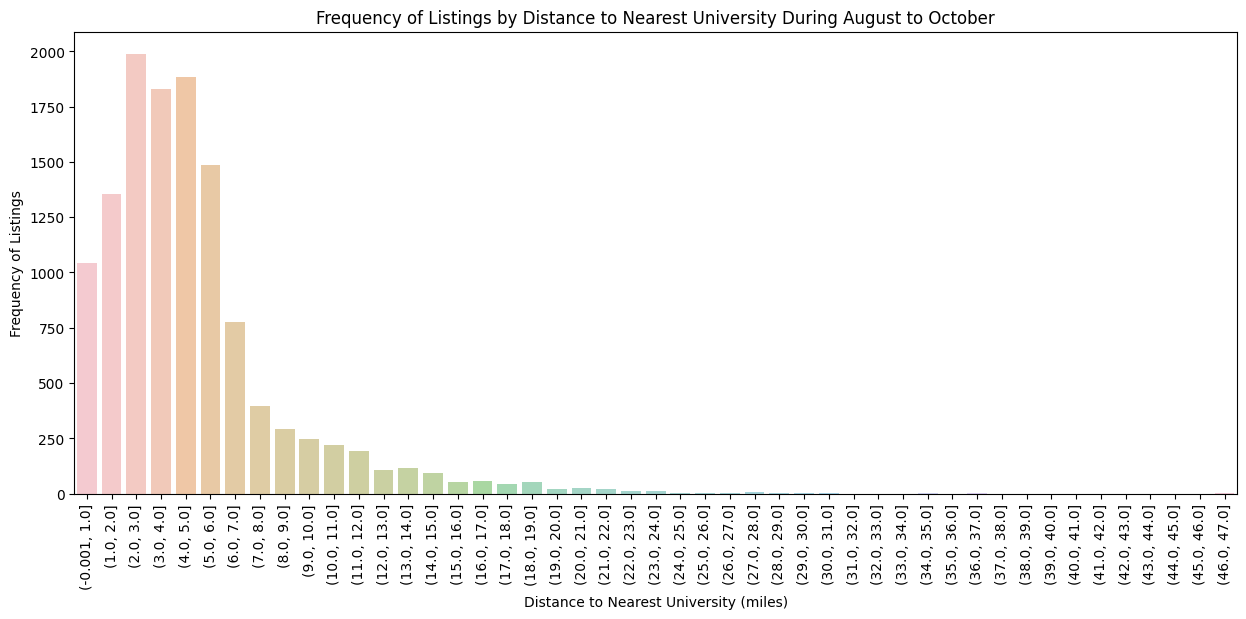

In [ ]:
start_months = [8, 9, 10]


start_month_df = df[df['month'].isin(start_months)]

max_distance = start_month_df['distance_to_nearest_university'].max()
bins = np.arange(0, max_distance, 1)

start_month_df['distance_bin'] = pd.cut(start_month_df['distance_to_nearest_university'], bins=bins, include_lowest=True)

plt.figure(figsize=(15, 6))

frequency_per_bin = start_month_df['distance_bin'].value_counts().sort_index()

sns.barplot(x=frequency_per_bin.index.categories, y=frequency_per_bin.values, alpha=0.5)

plt.title('Frequency of Listings by Distance to Nearest University During August to October')
plt.xlabel('Distance to Nearest University (miles)')
plt.ylabel('Frequency of Listings')
plt.xticks(rotation=90)
plt.show()

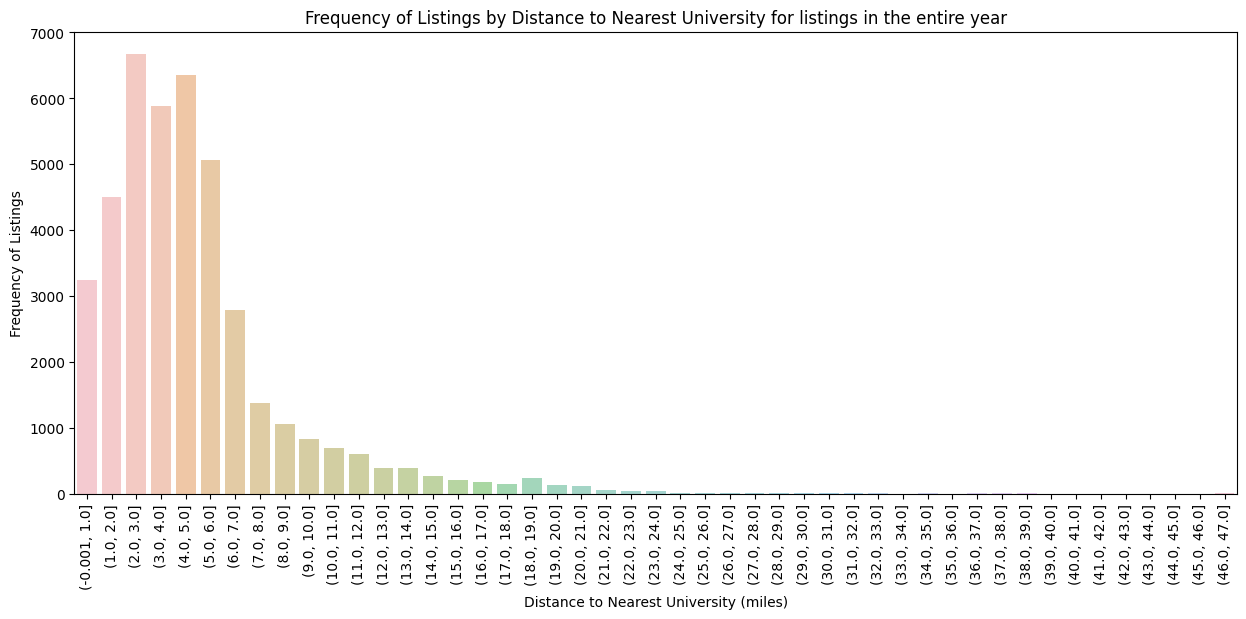

In [ ]:
start_months = range(1,13)


start_month_df = df[df['month'].isin(start_months)]

max_distance = start_month_df['distance_to_nearest_university'].max()
bins = np.arange(0, max_distance, 1)

start_month_df['distance_bin'] = pd.cut(start_month_df['distance_to_nearest_university'], bins=bins, include_lowest=True)

plt.figure(figsize=(15, 6))

frequency_per_bin = start_month_df['distance_bin'].value_counts().sort_index()

sns.barplot(x=frequency_per_bin.index.categories, y=frequency_per_bin.values, alpha=0.5)

plt.title('Frequency of Listings by Distance to Nearest University for listings in the entire year')
plt.xlabel('Distance to Nearest University (miles)')
plt.ylabel('Frequency of Listings')
plt.xticks(rotation=90)
plt.show()

Visualise how diffent universities and listings in different cities relate to log_price

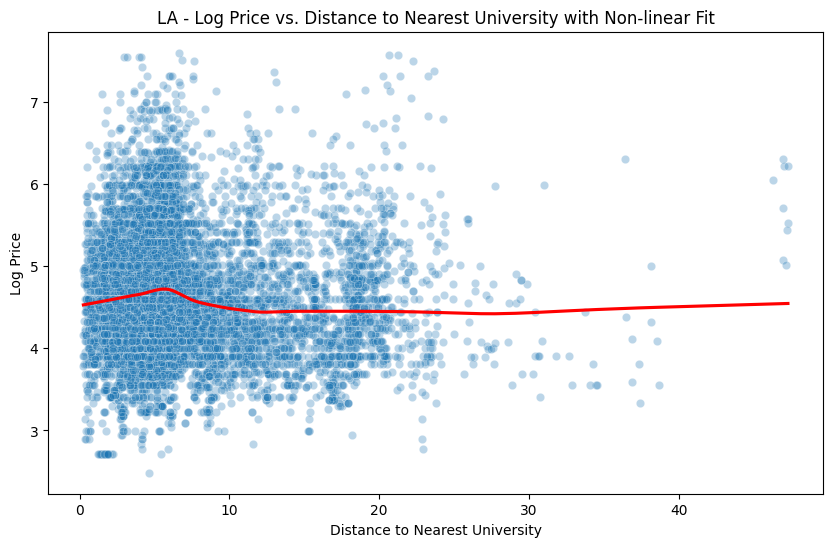

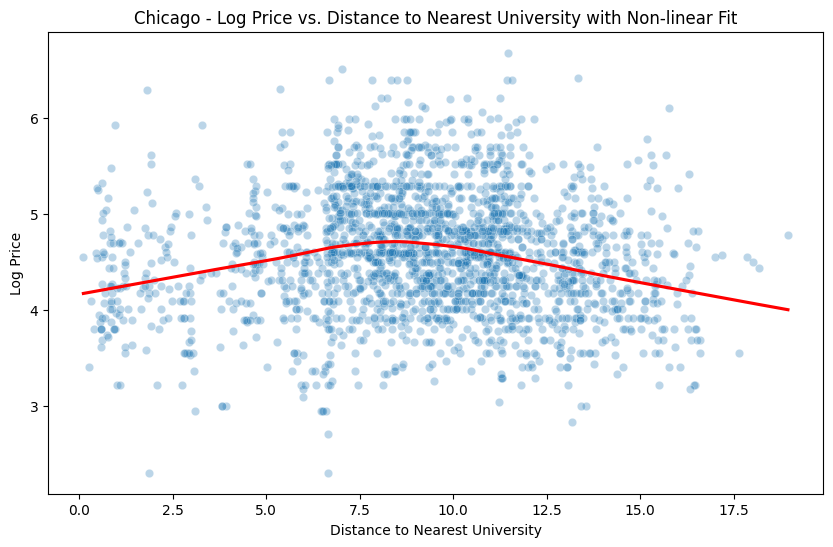

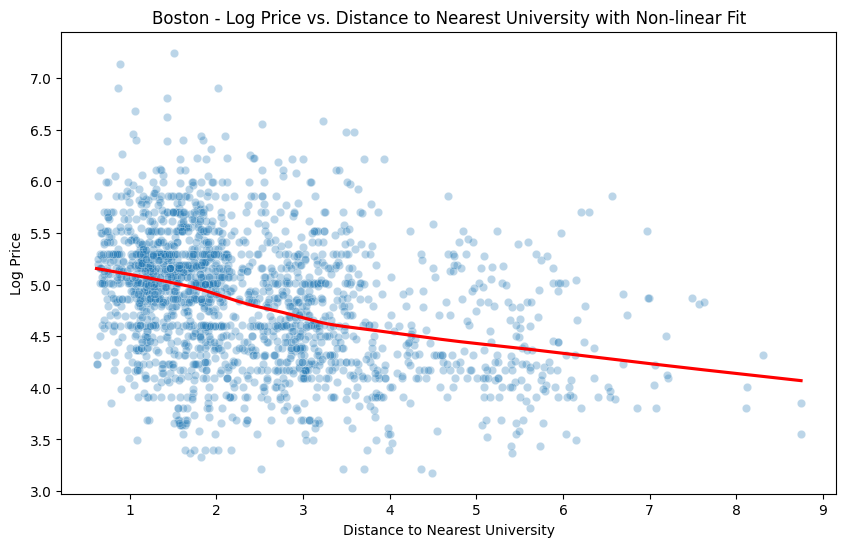

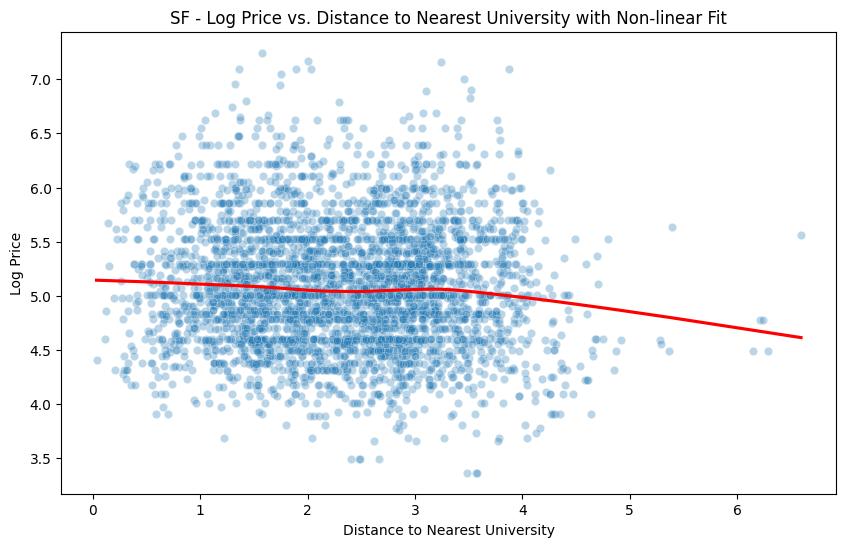

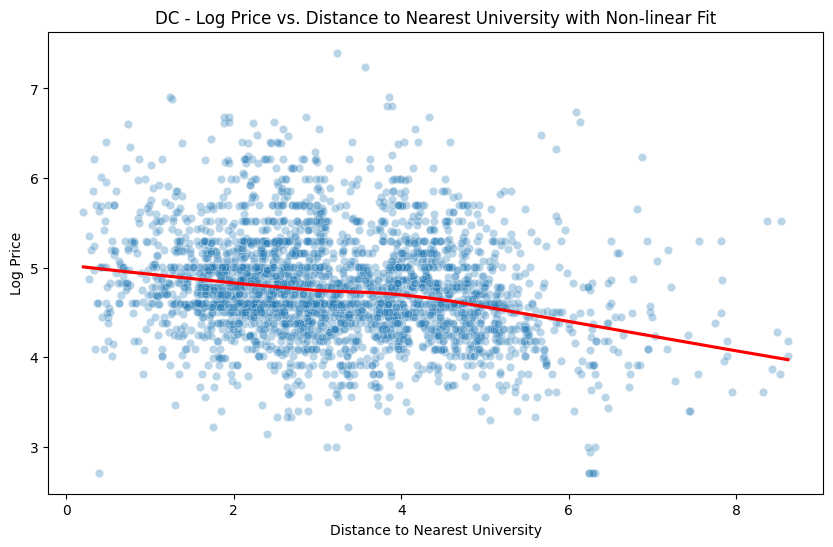

In [ ]:
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    plt.figure(figsize=(10, 6))

    # Plot the scatter points
    sns.scatterplot(data=df_city, x="distance_to_nearest_university", y="log_price", alpha=0.3)

    # Plot a lowess smoother for non-linear fit
    sns.regplot(data=df_city, x="distance_to_nearest_university", y="log_price",
                scatter=False, lowess=True, line_kws={'color': 'red'})

    plt.title(f"{city} - Log Price vs. Distance to Nearest University with Non-linear Fit")
    plt.xlabel("Distance to Nearest University")
    plt.ylabel("Log Price")
    plt.show()


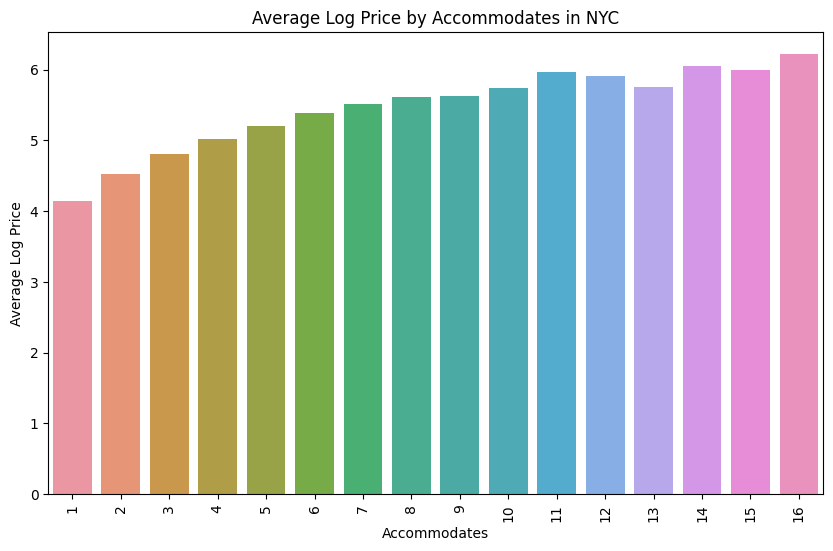

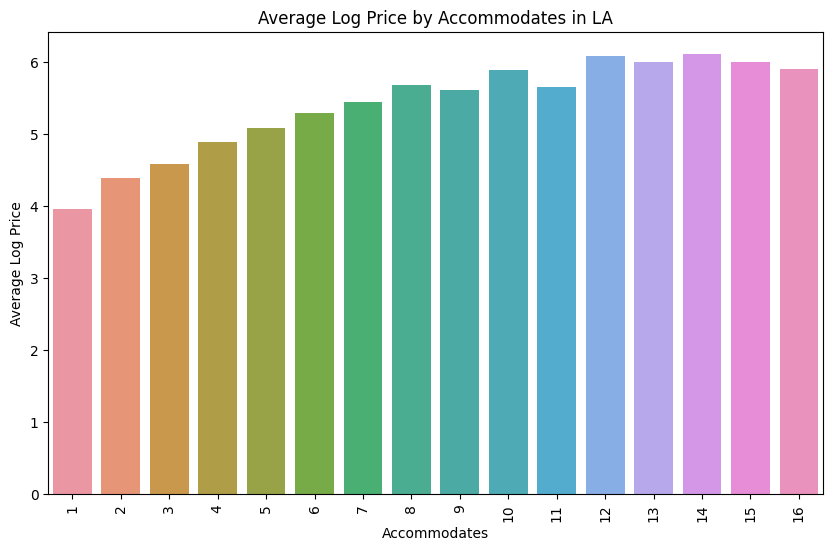

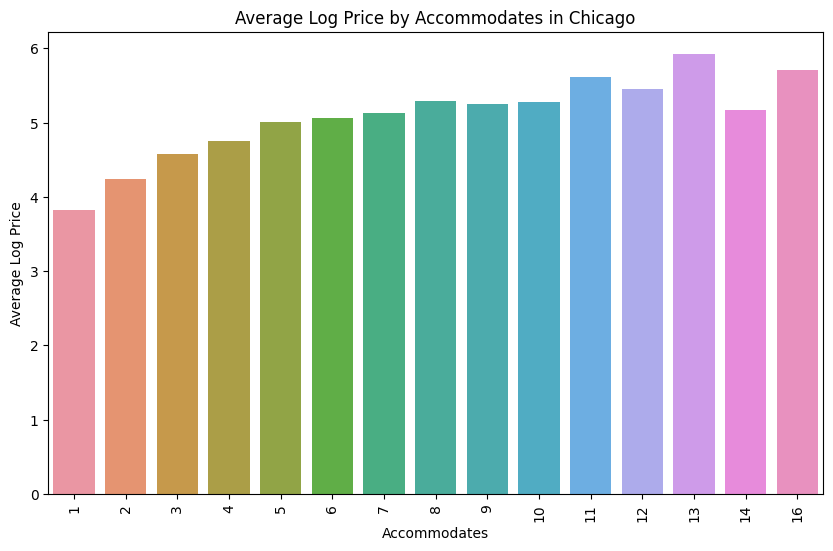

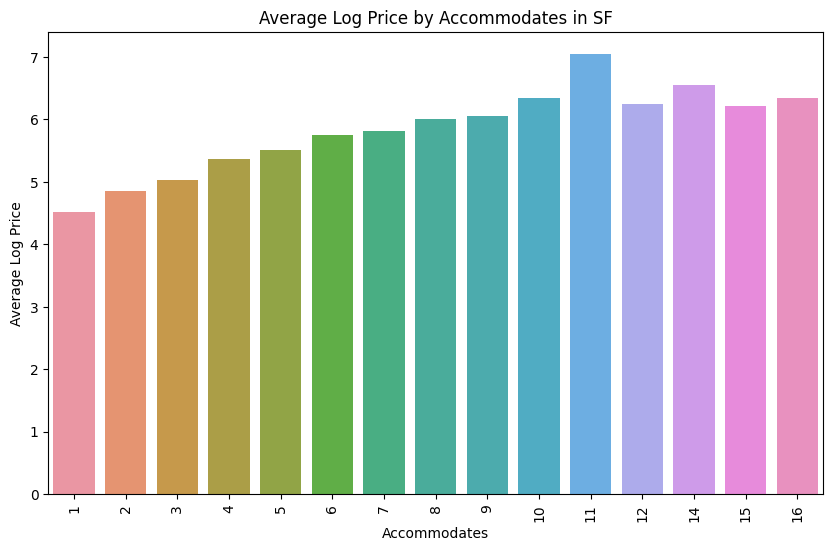

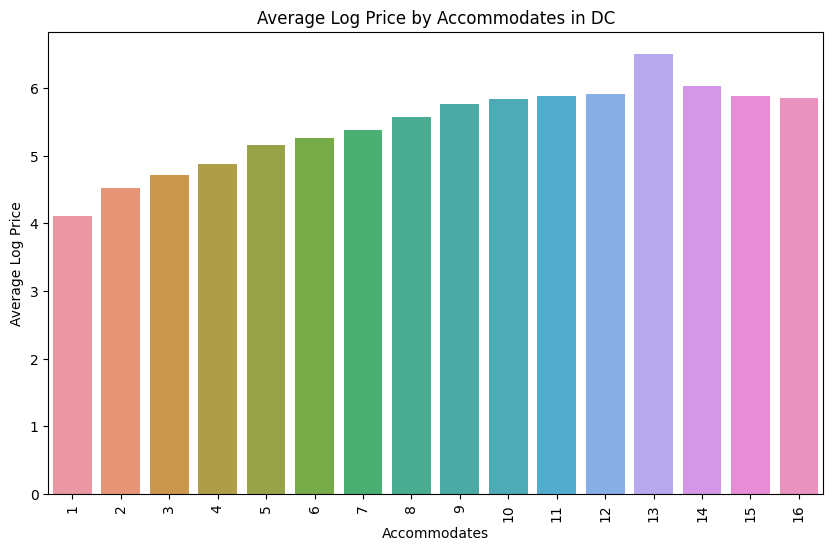

In [ ]:
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    avg_prices = df_city.groupby('accommodates')['log_price'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_prices, x='accommodates', y='log_price')

    plt.title(f'Average Log Price by Accommodates in {city}')
    plt.xlabel('Accommodates')
    plt.ylabel('Average Log Price')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if necessary
    plt.show()

# Let's investigate the relationship of Price Per Head (pph)

Price per head will ideally split the data into "Expensive" vs "Standard" Listings. If results show more high phh closer to universities, this could be indicative of some pattern.

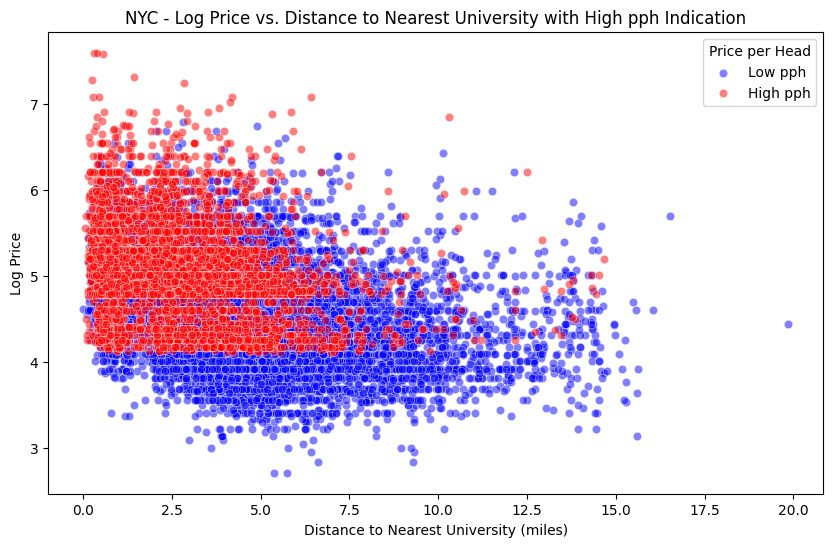

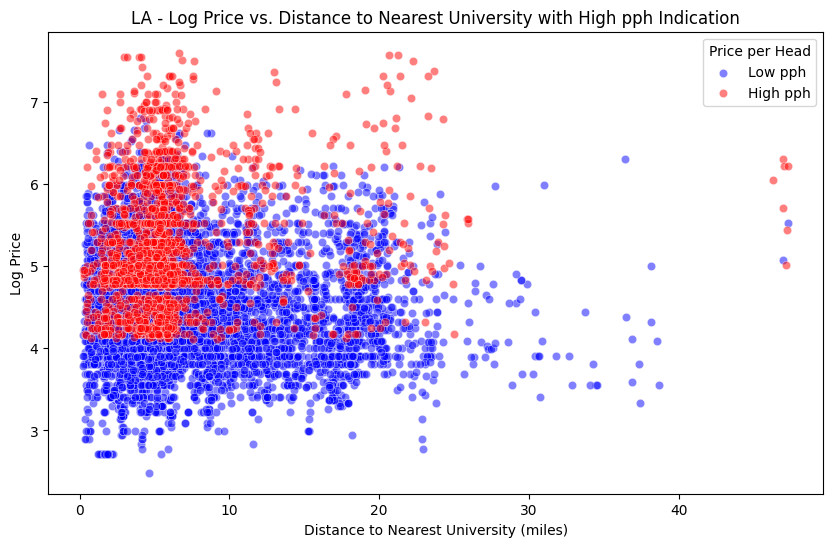

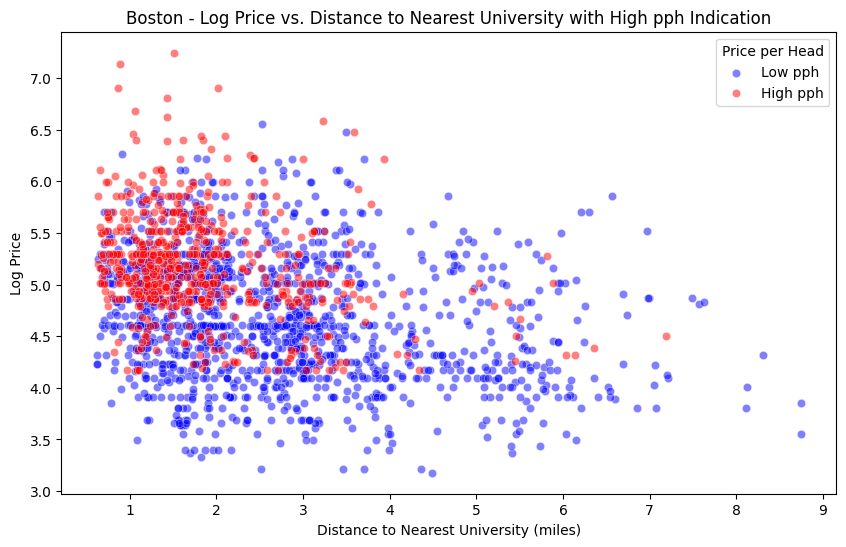

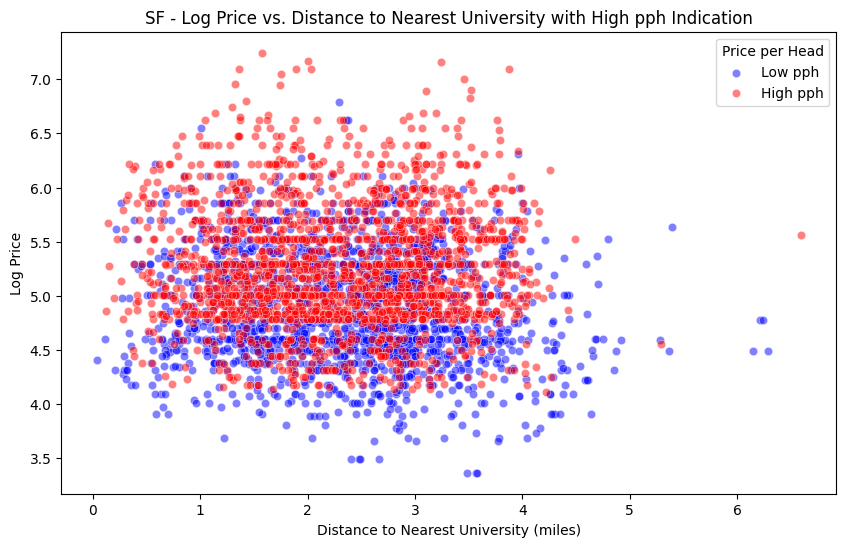

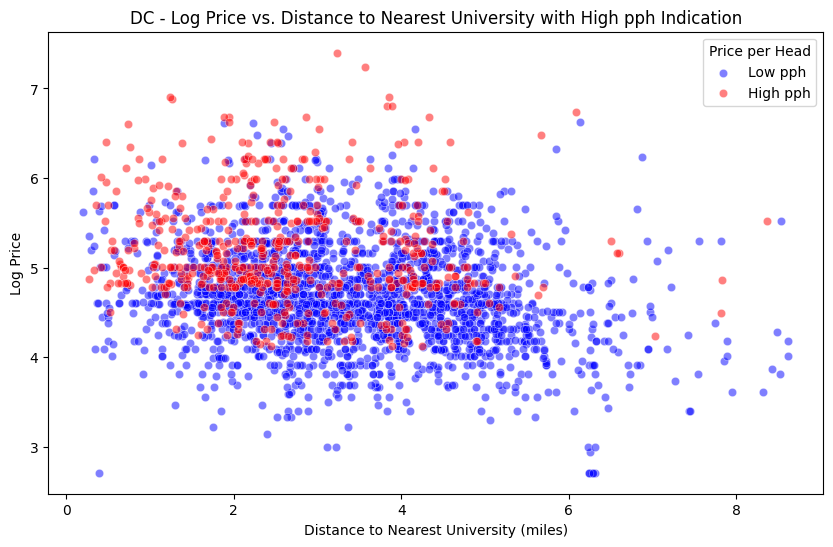

In [ ]:
# Calculate the price per head if not already done
df['price_per_head'] = np.exp(df['log_price']) / df['accommodates']

# Define a threshold for high price per head, e.g., 75th percentile of the 'price_per_head'
threshold_high_pph = df['price_per_head'].quantile(0.75)

# Create a new column that categorizes each listing based on its price per head
df['high_pph'] = df['price_per_head'] > threshold_high_pph

# Now, iterate over each city and create the scatter plots
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    plt.figure(figsize=(10, 6))

    # Plot all points with low price per head
    sns.scatterplot(data=df_city[df_city['high_pph'] == False],
                    x="distance_to_nearest_university", y="log_price",
                    alpha=0.5, color='blue', label='Low pph')

    # Plot all points with high price per head
    sns.scatterplot(data=df_city[df_city['high_pph'] == True],
                    x="distance_to_nearest_university", y="log_price",
                    alpha=0.5, color='red', label='High pph')

    plt.title(f"{city} - Log Price vs. Distance to Nearest University with High pph Indication")
    plt.xlabel("Distance to Nearest University (miles)")
    plt.ylabel("Log Price")
    plt.legend(title='Price per Head')
    plt.show()


Convert to Bargraph for easier visualisation.

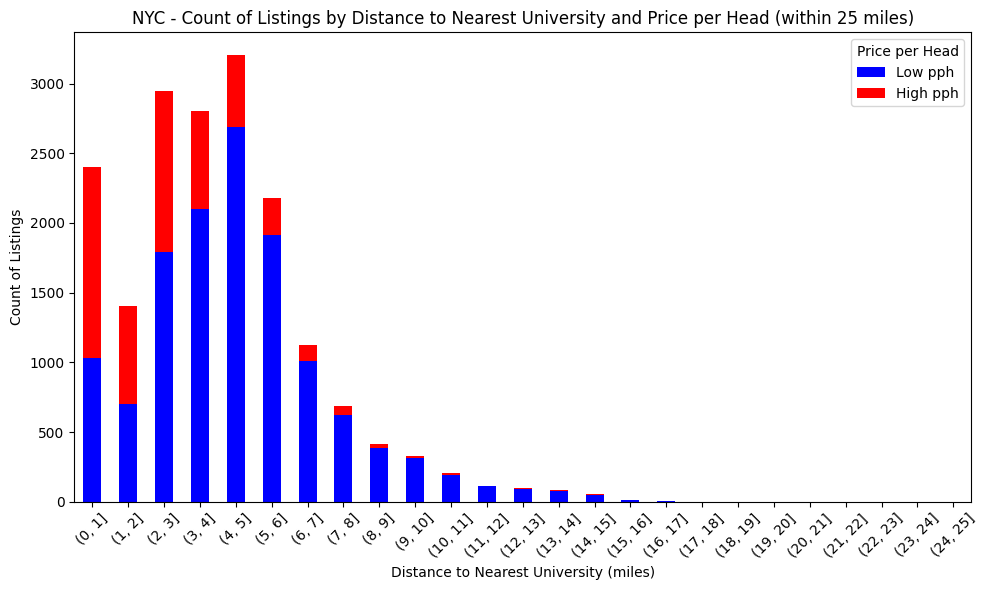

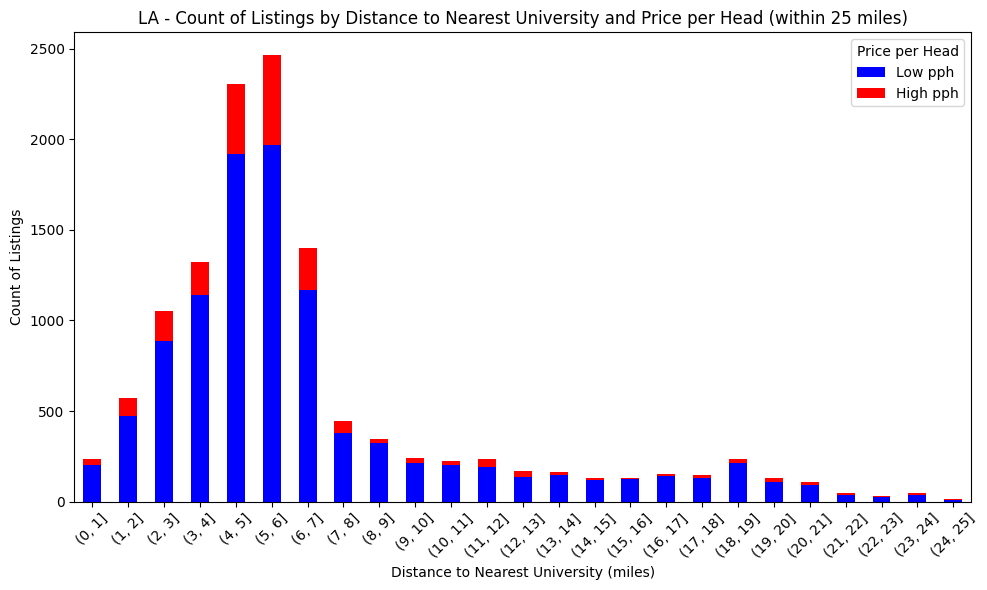

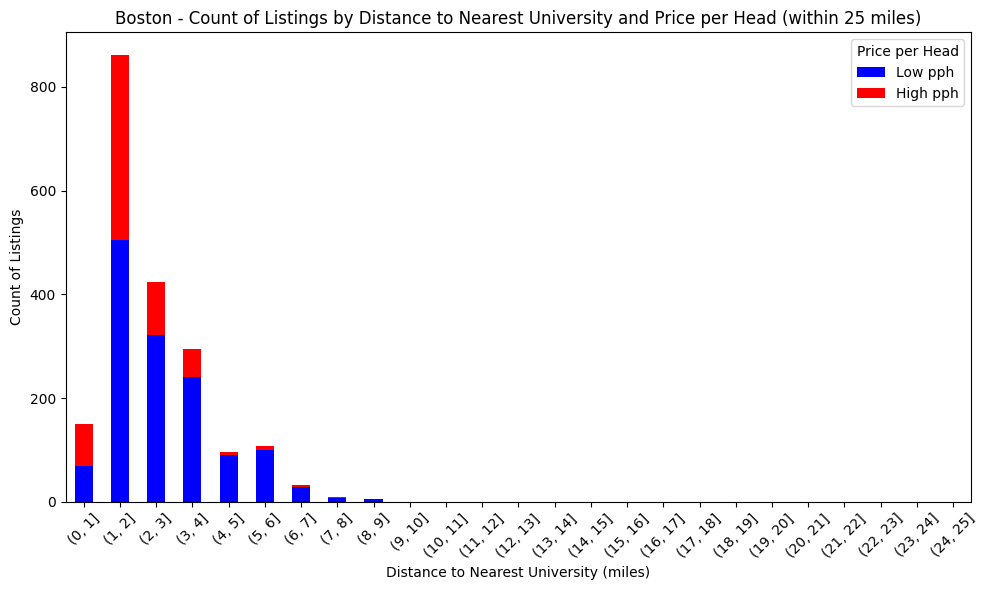

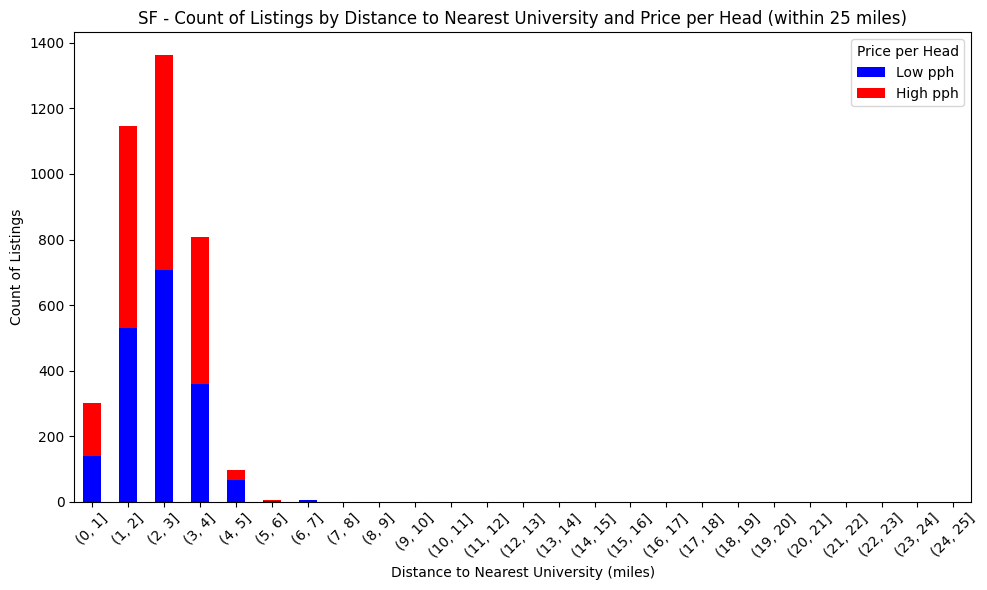

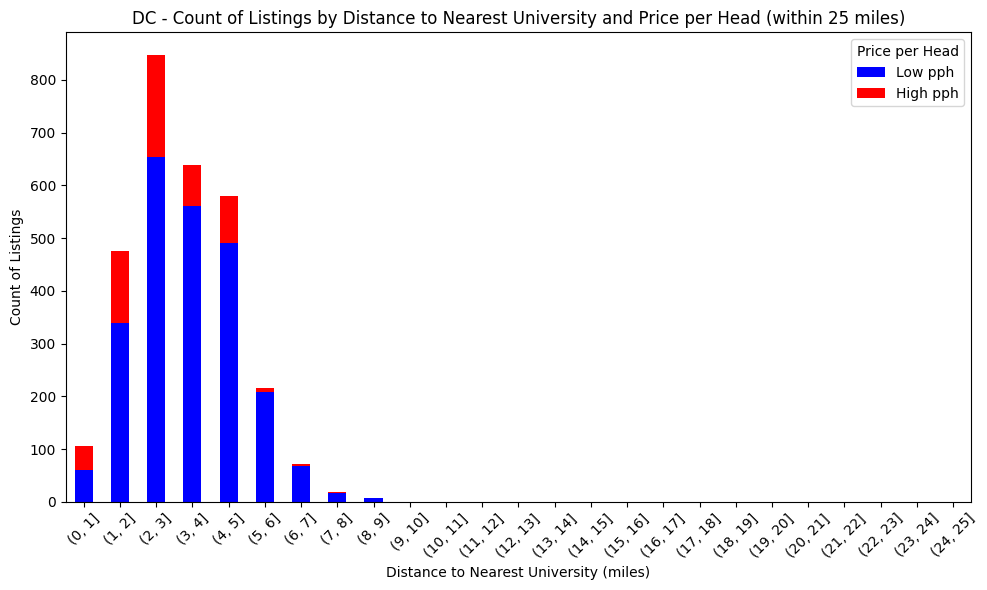

In [ ]:
# Filter the DataFrame to only include listings within 25 miles
df_within_25_miles = df[df['distance_to_nearest_university'] <= 25]

# Create distance bins up to 25 miles
max_distance = 25
bin_width = 1  # You can adjust the bin width as needed
df_within_25_miles['distance_bin'] = pd.cut(df_within_25_miles['distance_to_nearest_university'],
                                             bins=np.arange(0, max_distance + bin_width, bin_width))

# Now, create the stacked bar chart
for city in df_within_25_miles['city'].unique():
    df_city = df_within_25_miles[df_within_25_miles['city'] == city]

    # Count the number of high/low pph listings in each distance bin
    distance_price_count = df_city.groupby(['distance_bin', 'high_pph']).size().unstack().fillna(0)

    # Create the stacked bar plot
    distance_price_count.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10, 6))

    plt.title(f"{city} - Count of Listings by Distance to Nearest University and Price per Head (within 25 miles)")
    plt.xlabel("Distance to Nearest University (miles)")
    plt.ylabel("Count of Listings")
    plt.legend(title='Price per Head', labels=['Low pph', 'High pph'])
    plt.xticks(rotation=45)
    plt.tight_layout() # Adjust layout to fit the plot
    plt.show()

# Let's Try with Landmark Distances

In [ ]:
# Define landmarks with their coordinates
landmarks = pd.DataFrame({
    'landmark_name': ["Statue of Liberty","Times Square","Central Park","Empire State Building","Brooklyn Bridge","One World Trade Center","Hollywood Sign","Hollywood Walk of Fame","Griffith Observatory", "Santa Monica Pier","Getty Center","Los Angeles County Museum of Art (LACMA)","Millennium Park","The Bean (Cloud Gate)","Art Institute of Chicago","Navy Pier","Museum Campus (Shedd Aquarium, Field Museum, Adler Planetarium)","Willis Tower Skydeck","Boston Common","Fenway Park","Massachusetts State House","Boston Tea Party Ships & Museum",'Boston Public Garden',"Quincy Market","The White House","Washington Monument","Lincoln Memorial","National Cathedral",'Capitol Hill',"Library of Congress","Golden Gate Bridge","Alcatraz Island","Fisherman's Wharf","Pier 39","Coit Tower","Twin Peaks"],  # Add all landmark names
    'latitude': [40.689247, 40.758896, 40.785091, 40.748817, 40.706086, 40.712775, 34.1341, 34.1014, 34.1184, 34.0094, 34.078, 34.0639, 41.8919, 41.8781, 41.8915, 41.923, 41.7587, 41.8663, 42.3601, 42.3736, 42.3605, 42.3555, 42.3526, 42.3584, 38.8895, 38.8895, 38.8951, 38.9129, 38.8896, 38.8876, 37.7749, 37.8085, 37.7749, 37.8049, 37.7955, 37.7694],  # Add all latitudes
    'longitude': [-74.044502, -73.98513, -73.968285, -73.985428, -73.996864, -74.013418, -118.3215, -118.3255, -118.3004, -118.4961, -118.4741, -118.3598, -87.6056, -87.6298, -87.6079, -87.6324, -87.5673, -87.6168, -71.0589, -71.1097, -71.0548, -71.0608, -71.0645, -71.0636, -77.0353, -77.037, -77.0364, -77.0443, -77.0227, -77.0139, -122.4194, -122.4098, -122.4194, -122.4107, -122.393, -122.4862]})

# Function to calculate the distance to the nearest landmark
def distance_to_nearest_landmark(listing_coords, landmarks):
    distances = landmarks.apply(
        lambda landmark: haversine(listing_coords, (landmark['latitude'], landmark['longitude']), unit=Unit.MILES), axis=1)
    return distances.min()

# Calculate the distance for each listing in df
df['distance_to_nearest_landmark'] = df.apply(lambda row: distance_to_nearest_landmark((row['latitude'], row['longitude']), landmarks), axis=1)


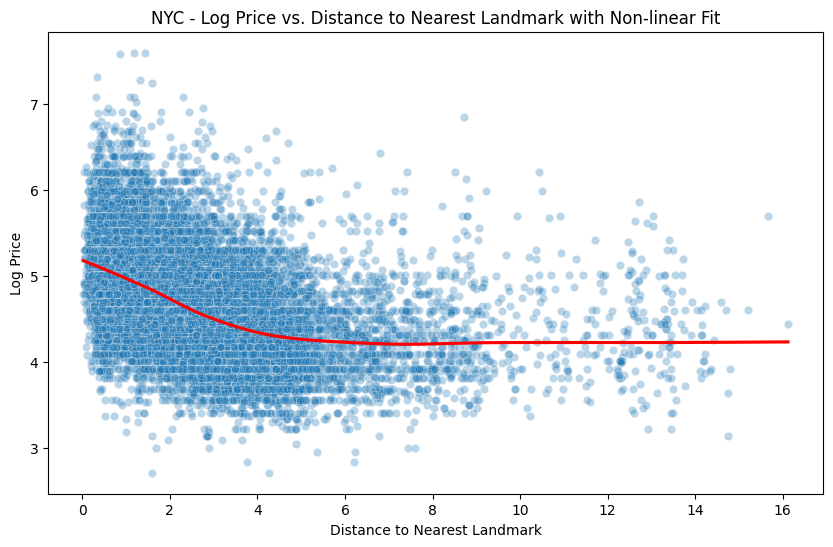

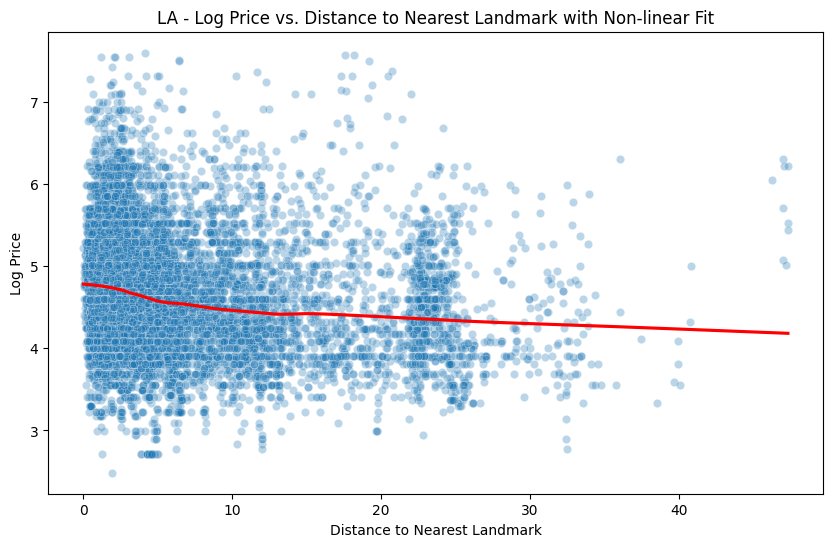

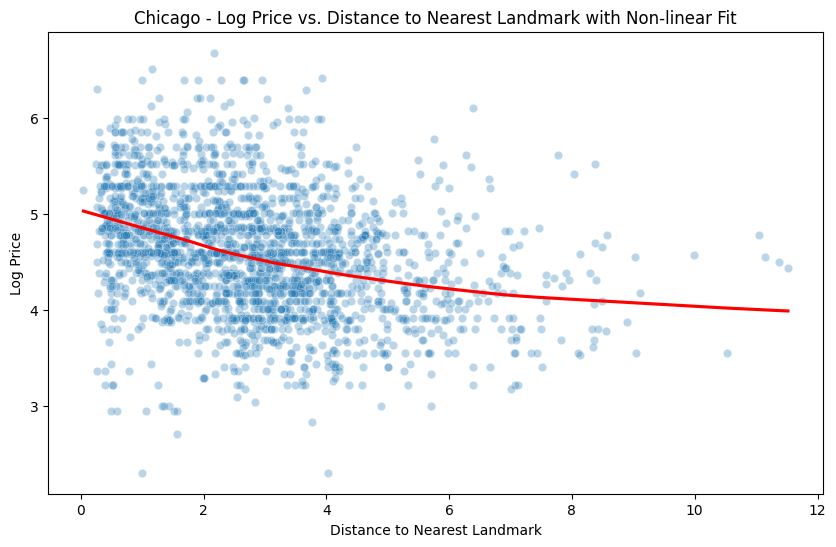

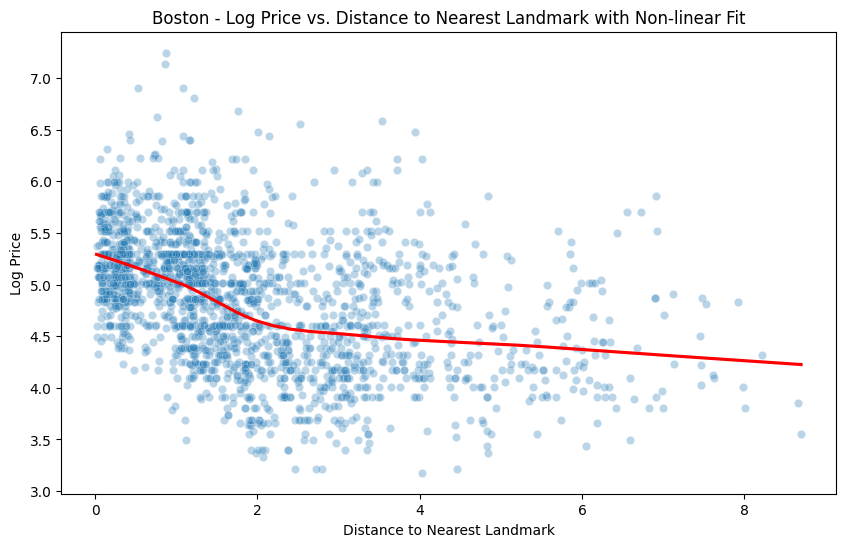

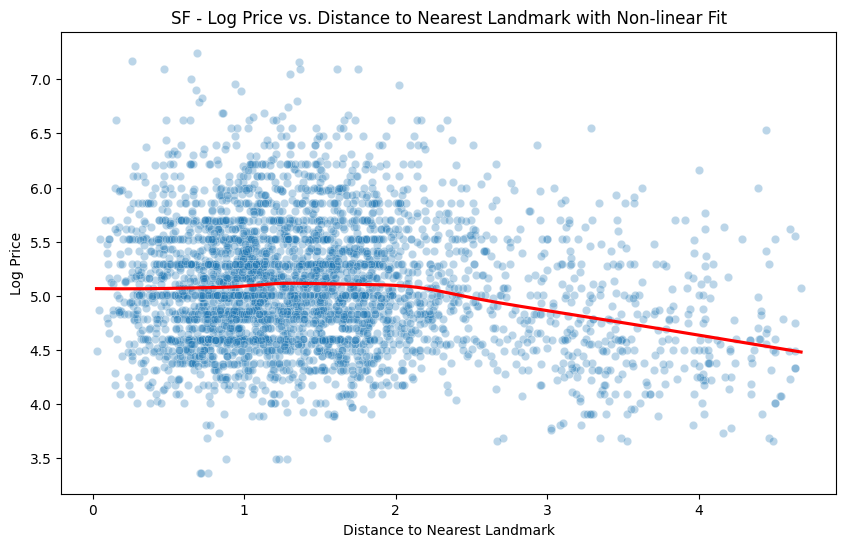

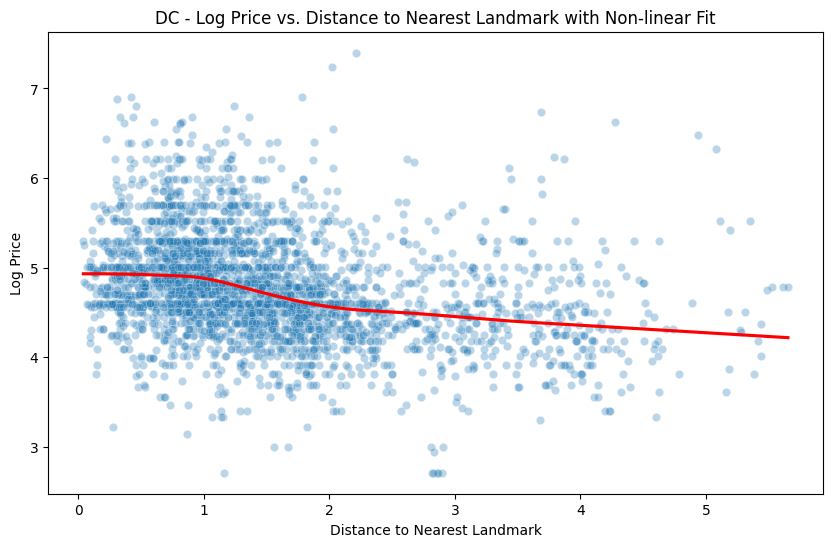

In [ ]:
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    plt.figure(figsize=(10, 6))

    # Plot the scatter points
    sns.scatterplot(data=df_city, x="distance_to_nearest_landmark", y="log_price", alpha=0.3)

    # Plot a lowess smoother for non-linear fit
    sns.regplot(data=df_city, x="distance_to_nearest_landmark", y="log_price",
                scatter=False, lowess=True, line_kws={'color': 'red'})

    plt.title(f"{city} - Log Price vs. Distance to Nearest Landmark with Non-linear Fit")
    plt.xlabel("Distance to Nearest Landmark")
    plt.ylabel("Log Price")
    plt.show()


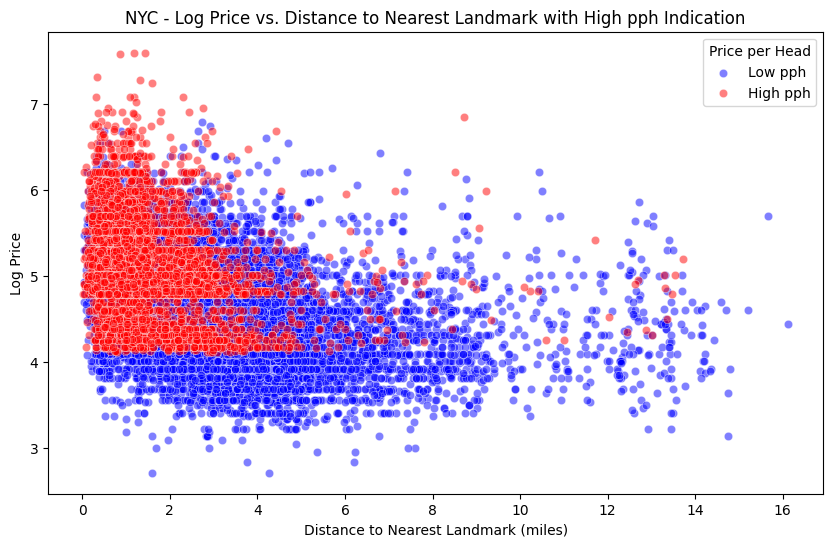

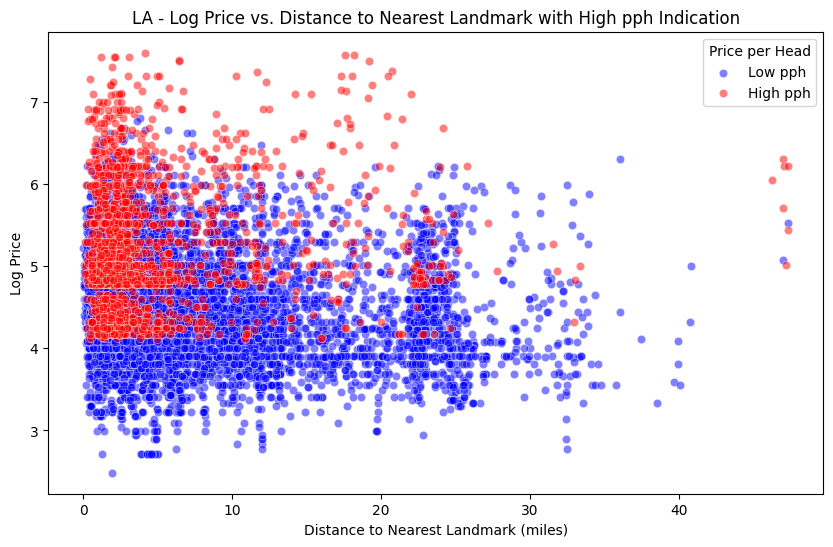

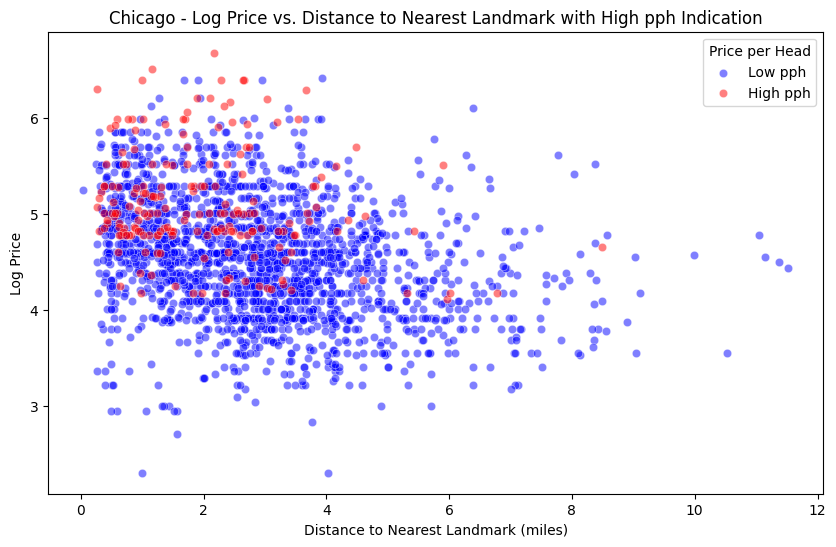

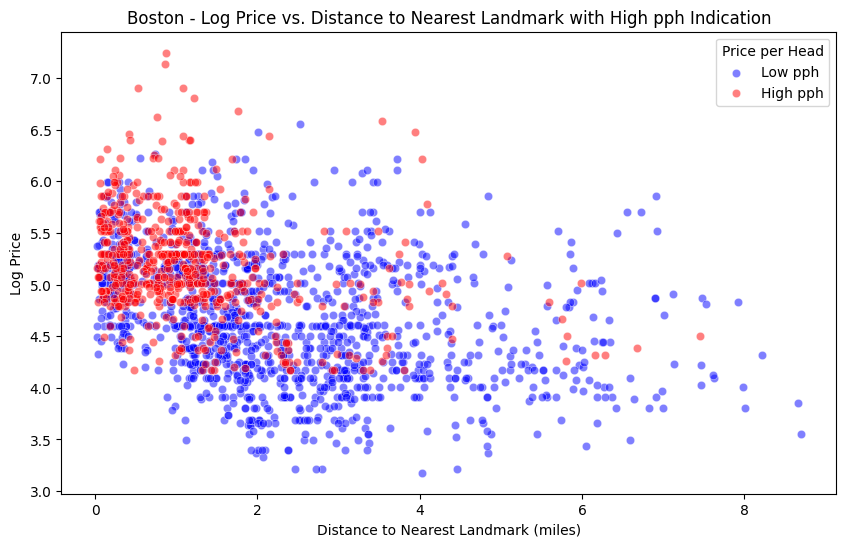

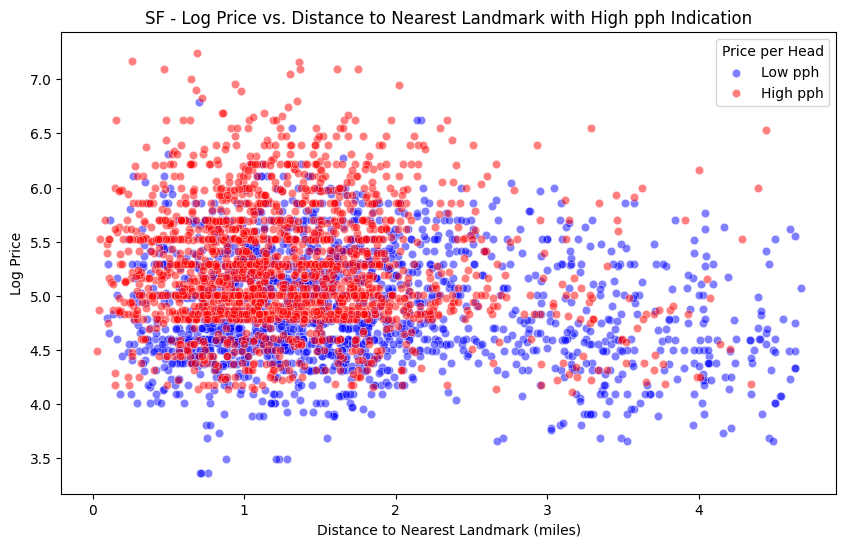

In [ ]:
# Now, iterate over each city and create the scatter plots
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    plt.figure(figsize=(10, 6))

    # Plot all points with low price per head
    sns.scatterplot(data=df_city[df_city['high_pph'] == False],
                    x="distance_to_nearest_landmark", y="log_price",
                    alpha=0.5, color='blue', label='Low pph')

    # Plot all points with high price per head
    sns.scatterplot(data=df_city[df_city['high_pph'] == True],
                    x="distance_to_nearest_landmark", y="log_price",
                    alpha=0.5, color='red', label='High pph')

    plt.title(f"{city} - Log Price vs. Distance to Nearest Landmark with High pph Indication")
    plt.xlabel("Distance to Nearest Landmark (miles)")
    plt.ylabel("Log Price")
    plt.legend(title='Price per Head')
    plt.show()


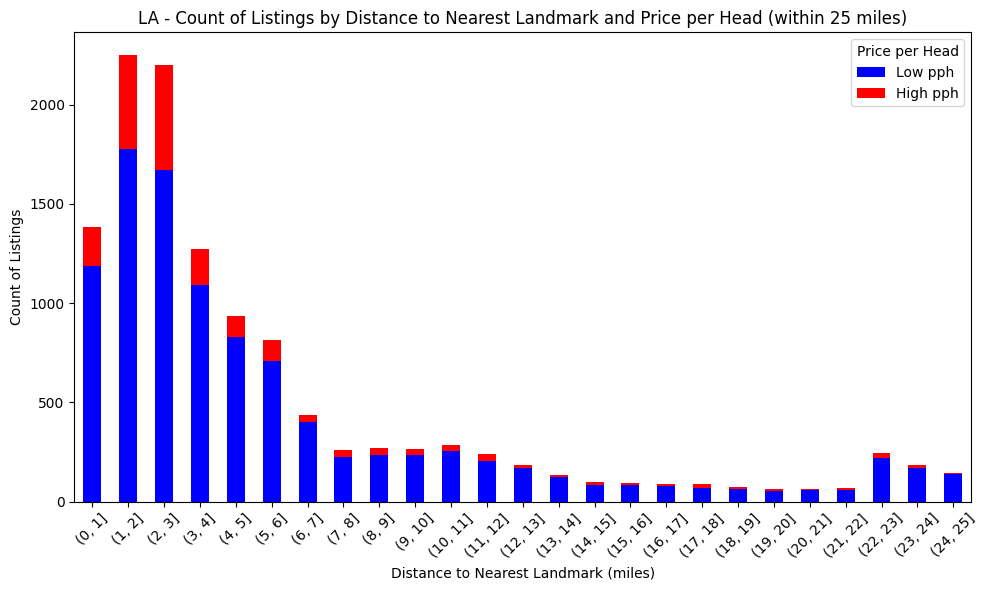

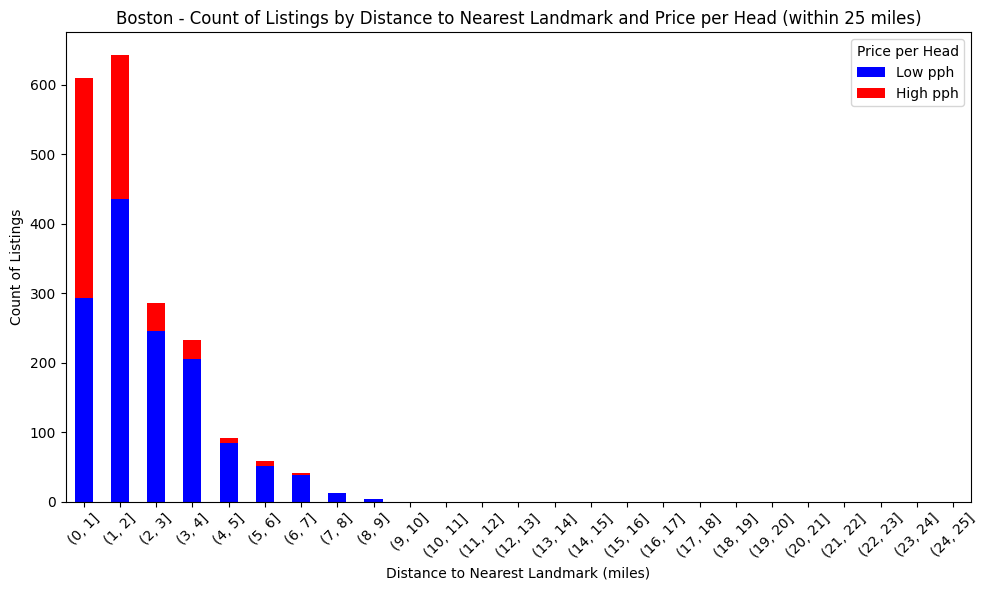

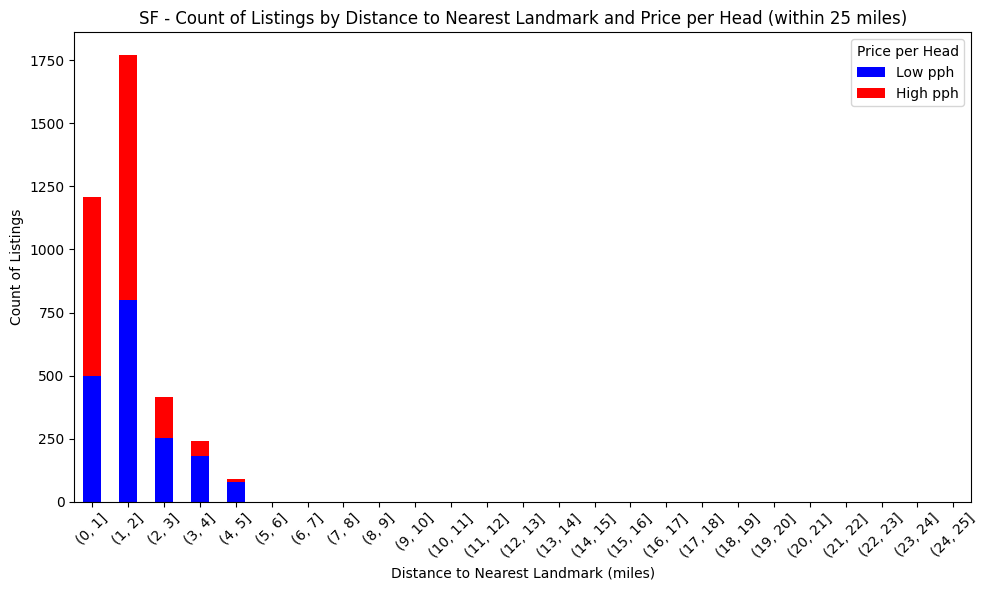

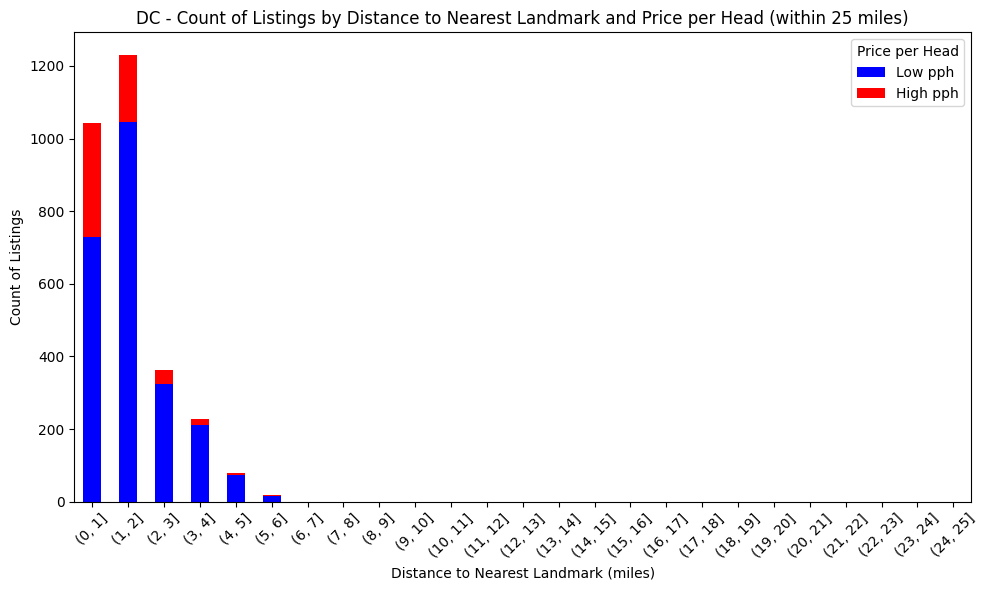

In [ ]:
# Filter the DataFrame to only include listings within 25 miles
df_within_25_miles = df[df['distance_to_nearest_landmark'] <= 25]

# Create distance bins up to 25 miles
max_distance = 25
bin_width = 1  # You can adjust the bin width as needed
df_within_25_miles['distance_bin'] = pd.cut(df_within_25_miles['distance_to_nearest_landmark'],
                                             bins=np.arange(0, max_distance + bin_width, bin_width))

# Now, create the stacked bar chart
for city in df_within_25_miles['city'].unique():
    df_city = df_within_25_miles[df_within_25_miles['city'] == city]

    # Count the number of high/low pph listings in each distance bin
    distance_price_count = df_city.groupby(['distance_bin', 'high_pph']).size().unstack().fillna(0)

    # Create the stacked bar plot
    distance_price_count.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10, 6))

    plt.title(f"{city} - Count of Listings by Distance to Nearest Landmark and Price per Head (within 25 miles)")
    plt.xlabel("Distance to Nearest Landmark (miles)")
    plt.ylabel("Count of Listings")
    plt.legend(title='Price per Head', labels=['Low pph', 'High pph'])
    plt.xticks(rotation=45)
    plt.tight_layout() # Adjust layout to fit the plot
    plt.show()

# Train a model

In [ ]:
df_new = pd.DataFrame({})

# Target Feature
df_new["log_price"] = df.log_price.copy()

# Categorical Features
df_new["property_type"] = df.property_type.copy()
df_new["room_type"] = df.room_type.copy()
df_new["bed_type"] = df.bed_type.copy()
df_new["cancellation_policy"] = df.cancellation_policy.copy()
df_new["city"] = df.city.copy()
df_new["instant_bookable"] = df.instant_bookable.replace({'f': 0, 't': 1})
df_new["neighbourhood"] = df.neighbourhood.copy()
df_new["zipcode"] = df.zipcode.copy()


# Numerical Features
df_new["accommodates"] = df.accommodates.copy()
df_new["bathrooms"] = df.bathrooms.copy()
df_new["beds"] = df.beds.copy()
df_new["latitude"] = df.latitude.copy()
df_new["longitude"] = df.longitude.copy()
df_new["bedrooms"] = pd.to_numeric(df.bedrooms, errors='coerce').fillna(0).astype(int)
df_new["number_of_reviews"] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
df_new["review_scores_rating"] = pd.to_numeric(df['review_scores_rating'], errors='coerce')
df_new["number_of_reviews"].fillna(0, inplace=True)
df_new["review_scores_rating"].fillna(df_new["review_scores_rating"].median(), inplace=True)
df_new["month"] = df.month.copy()
df_new["year"] = df.year.copy()
df_new["distance_to_nearest_university"] = df.distance_to_nearest_university.copy()
df_new["cleaning_fee"] = df.cleaning_fee.astype(int).copy()  # Converting boolean to int
df_new["distance_to_nearest_landmark"] = df['distance_to_nearest_landmark'].copy()

# Drop the row with index 1
df_new.drop(index=1, inplace=True)

# Reset the index after dropping the row, if needed
df_new.reset_index(drop=True, inplace=True)


# Display the new DataFrame
df_new

log_price property_type        room_type  bed_type cancellation_policy  \
0       4.442651     Apartment  Entire home/apt  Real Bed              strict   
1       4.941642     Apartment  Entire home/apt  Real Bed              strict   
2       4.174387         House     Private room  Real Bed              strict   
3       4.934474     Apartment  Entire home/apt  Real Bed            moderate   
4       5.075174         House  Entire home/apt  Real Bed              strict   
...          ...           ...              ...       ...                 ...   
41331   4.941642     Apartment  Entire home/apt  Real Bed            moderate   
41332   4.007333         House     Private room  Real Bed            moderate   
41333   4.624973     Apartment     Private room  Real Bed            flexible   
41334   4.905275     Apartment  Entire home/apt  Real Bed              strict   
41335   5.135798     Apartment  Entire home/apt  Real Bed            moderate   

          city  instant_bookable              neighbourhood zipcode  \
0          NYC                 0                  Sunnyside   11104   
1          NYC                 0                   Bushwick   11237   
2          NYC                 1         Bedford-Stuyvesant   11206   
3      Chicago                 0                Wicker Park   60622   
4           LA                 0                     Venice   90291   
...        ...               ...                        ...     ...   
41331      NYC                 0               Williamsburg   11211   
41332       LA                 0  Westchester/Playa Del Rey   90045   
41333      NYC                 0             Hell's Kitchen   10019   
41334   Boston                 0                  North End    2113   
41335   Boston                 0                   Back Bay    2115   

       accommodates  ...   latitude   longitude  bedrooms  number_of_reviews  \
0                 2  ...  40.741473  -73.919972         0                  2   
1                 5  ...  40.698671  -73.911344         2                 24   
2                 2  ...  40.694950  -73.950264         1                121   
3                 4  ...  41.906908  -87.668331         1                 25   
4                 2  ...  33.989964 -118.471855         1                  6   
...             ...  ...        ...         ...       ...                ...   
41331             2  ...  40.717502  -73.949534         1                 46   
41332             2  ...  33.959126 -118.394878         1                 97   
41333             3  ...  40.765034  -73.988267         1                  5   
41334             2  ...  42.367960  -71.055729         1                323   
41335             2  ...  42.350678  -71.086642         0                 13   

       review_scores_rating  month  year  distance_to_nearest_university  \
0                        90      7  2015                        4.096762   
1                       100      3  2016                        4.930468   
2                        87     12  2014                        3.380989   
3                        94      9  2015                        8.925388   
4                       100      1  2016                        5.663529   
...                     ...    ...   ...                             ...   
41331                    98      8  2014                        2.586578   
41332                    98      8  2016                        7.639535   
41333                   100      8  2017                        2.519918   
41334                    88      9  2013                        1.931770   
41335                   100      4  2017                        0.699916   

       cleaning_fee  distance_to_nearest_landmark  
0                 1                      3.463767  
1                 1                      4.508766  
2                 1                      2.559371  
3                 1                      2.156174  
4                 1                      1.9318

In [ ]:
# Calculate the percentage contribution of each category
def reduce_categories(column, threshold=0.05):
    series = pd.value_counts(df_new[column]) / len(df_new)
    other_categories = series[series < threshold].index
    reduced_series = df_new[column].replace(other_categories, 'Other')
    return reduced_series

# Apply the reduction to specific columns
for col in ['property_type', 'bed_type', 'room_type']:
    df_new[col + '_reduced'] = reduce_categories(col)

# Classify zipcodes based on price percentiles
price_by_zipcode = df_new.groupby('zipcode')['log_price'].mean()
low_threshold = price_by_zipcode.quantile(0.25)
high_threshold = price_by_zipcode.quantile(0.75)

def classify_zipcode(zipcode):
    if price_by_zipcode[zipcode] <= low_threshold:
        return 'Cheap'
    elif price_by_zipcode[zipcode] >= high_threshold:
        return 'Rich'
    else:
        return 'Normal'

df_new['zipcode_class'] = df_new['zipcode'].apply(classify_zipcode)
# Filter out rows where 'bed_type_reduced' is 'super_strict_30' or 'super_strict_60'
df_new = df_new[~df_new['cancellation_policy'].isin(['super_strict_30', 'super_strict_60'])]

# Reset the index if necessary
df_new.reset_index(drop=True, inplace=True)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables using get_dummies
categorical_cols = ['property_type_reduced', 'room_type_reduced', 'bed_type_reduced', 'cancellation_policy', 'city', 'zipcode_class']
df_new_encoded = pd.get_dummies(df_new, columns=categorical_cols)

# Prepare the feature matrix (X) and target vector (y)
X = df_new_encoded.drop(['log_price', 'neighbourhood','property_type', 'room_type', 'bed_type', 'zipcode'], axis=1)
y = df_new_encoded['log_price']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.36215294418109634, learning_rate=0.08180663836552764, max_depth=6, n_estimators=727, min_child_weight=5, reg_alpha=0.91761860123517)

# Fit the regressor to the training set
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

# colsample_bytree=0.4529597846537844, learning_rate=0.09994435019857918, max_depth=6, n_estimators=261, min_child_weight=9, reg_alpha=0.6850937926418198
# Mean Squared Error (MSE): 0.08027221244976465
# Root Mean Squared Error (RMSE): 0.2833235119960302
# R-squared Score (R2): 0.7982658649002126

Mean Squared Error (MSE): 0.08024374686916536
Root Mean Squared Error (RMSE): 0.28327327242287675
R-squared Score (R2): 0.7983374024735155


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 1000),
    'learning_rate': uniform(0.001, 0.3),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.1, 1),
    'min_child_weight': randint(0, 10),
    'reg_alpha': uniform(0, 1),
}

xgb_reg = XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters and best score (R2)
print("Best parameters found: ", random_search.best_params_)
print("Highest R2 found: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': 0.7600094302188288, 'learning_rate': 0.03448403090052954, 'max_depth': 6, 'min_child_weight': 0, 'n_estimators': 808, 'reg_alpha': 0.7881219427660264}
Highest R2 found:  0.7950062341481064


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")


Mean Squared Error (MSE): 0.0866845104778578
Root Mean Squared Error (RMSE): 0.2944223335242383
R-squared Score (R2): 0.7821509559270858


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)
# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

Mean Squared Error (MSE): 0.1693354600014972
Root Mean Squared Error (RMSE): 0.4115039003478548
R-squared Score (R2): 0.5744387562943415


# LOAD NEW DATA

In [ ]:
df_2 = pd.read_csv("train2_1.csv")  # Load Data
df_2 = df_2[df_2[['Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']].isna().all(axis=1)].copy() # Drop rows where 'Unnamed: 27' or 'Unnamed: 28' have non-NaN values
df_2.drop(["Unnamed: 27", "Unnamed: 28", 'Unnamed: 29', 'Unnamed: 30', "id", "thumbnail_url", "name"], axis=1, inplace=True) # Drop specified columns
df_2.drop_duplicates(inplace=True) # Drop duplicates
df_2.reset_index(drop=True, inplace=True) # Reset index
df_2['raw_price'] = np.exp(df_2['log_price'])
df_2 # Display the DataFrame

log_price property_type        room_type  accommodates  bathrooms  \
0       4.499810     Apartment  Entire home/apt             2        1.0   
1       4.234107     Apartment     Private room             1        1.0   
2       4.553877     Apartment     Private room             2        1.0   
3       4.174387     Apartment     Private room             2        1.0   
4       4.553877     Apartment  Entire home/apt             2        1.0   
...          ...           ...              ...           ...        ...   
11633   5.521461     Apartment  Entire home/apt             2        1.0   
11634   4.204693         House     Private room             2        1.0   
11635   4.382027     Apartment     Private room             2        1.0   
11636   4.770685         House  Entire home/apt             4        2.0   
11637   5.293305     Apartment  Entire home/apt             2        1.0   

       bed_type cancellation_policy  cleaning_fee    city first_review  ...  \
0      Real Bed              strict         False     NYC   2017-08-10  ...   
1      Real Bed            flexible          True     NYC   2014-12-10  ...   
2      Real Bed              strict          True     NYC   2017-09-19  ...   
3      Real Bed              strict          True     NYC   2017-01-08  ...   
4      Real Bed            moderate          True      SF   2017-01-02  ...   
...         ...                 ...           ...     ...          ...  ...   
11633  Real Bed            moderate         False     NYC   2016-09-11  ...   
11634  Real Bed            moderate         False  Boston   2017-10-04  ...   
11635  Real Bed              strict          True     NYC   2017-08-09  ...   
11636  Real Bed            flexible          True      LA   2015-10-06  ...   
11637  Real Bed              strict          True      LA   2016-04-03  ...   

      last_review   latitude   longitude       neighbourhood  \
0      2017-09-29  40.754641  -73.917554             Astoria   
1      2016-09-01  40.661547  -73.990133   Greenwood Heights   
2      2017-09-25  40.680046  -73.940917  Bedford-Stuyvesant   
3      2017-08-16  40.799741  -73.962055     Upper West Side   
4      2017-07-17  37.788189 -122.413427            Downtown   
...           ...        ...         ...                 ...   
11633  2016-10-24  40.728747  -73.984344        East Village   
11634  2017-10-04  42.324830  -71.107457       Jamaica Plain   
11635  2017-09-27  40.802032  -73.966188     Upper West Side   
11636  2016-01-15  34.109001 -118.323494     Hollywood Hills   
11637  2017-04-02  34.073776 -118.387793                 NaN   

      number_of_reviews review_scores_rating  zipcode  bedrooms beds raw_price  
0                     3                   93    11101         1  1.0      90.0  
1                     7                   67    11215         1  1.0      69.0  
2                     2                  100    11216         1  1.0      95.0  
3                    10                   96    10025         1  1.0      65.0  
4                     5                   80    94109         0  1.0      95.0  
...                 ...                  ...      ...       ...  ...       ...  
11633                 3                   80    10009         1  1.0     250.0  
11634                 1                  100     2130         0  1.0      67.0  
11635                11                   96    10025         1  1.0      80.0  
11636                 7                   94    90068         2  3.0     118.0  
11637                 9                   91    90211         1  1.0     199.0  

[11638 rows x 25 columns]

In [ ]:
df_2['bathrooms'] = df_2['bathrooms'].fillna(0)
df_2['bedrooms'] = df_2['bedrooms'].fillna(0)
df_2.dropna(subset=["host_has_profile_pic", "host_identity_verified", "host_since", "number_of_reviews", "review_scores_rating", "beds"], axis=0, inplace=True)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11375 entries, 0 to 11637
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               11375 non-null  float64
 1   property_type           11375 non-null  object 
 2   room_type               11375 non-null  object 
 3   accommodates            11375 non-null  int64  
 4   bathrooms               11375 non-null  float64
 5   bed_type                11375 non-null  object 
 6   cancellation_policy     11375 non-null  object 
 7   cleaning_fee            11375 non-null  bool   
 8   city                    11375 non-null  object 
 9   first_review            11374 non-null  object 
 10  host_has_profile_pic    11375 non-null  object 
 11  host_identity_verified  11375 non-null  object 
 12  host_response_rate      9483 non-null   object 
 13  host_since              11375 non-null  object 
 14  instant_bookable        11375 non-null

# Fill in Missing Zipcodes and obtain missing neighbourhood values

In [ ]:
from uszipcode import SearchEngine

search = SearchEngine()
def get_zipcode(lat, lon):
    if (lat, lon) in coords_cache:
        return coords_cache[(lat, lon)]

    result = search.by_coordinates(lat=lat, lng=lon, returns=1)
    zipcode = result[0].zipcode if result else None

    coords_cache[(lat, lon)] = zipcode
    return zipcode
# Cache for storing coordinates and zipcodes
coords_cache = {}
# Apply the function to rows with missing zip codes
for index, row in df_2[df_2['zipcode'].isna()].iterrows():
    df_2.at[index, 'zipcode'] = get_zipcode(row['latitude'], row['longitude'])

Exception ignored in: <function SearchEngine.__del__ at 0x7cb798865240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

In [ ]:
# Find the most frequent neighbourhood for each zipcode
zipcode_to_neighbourhood = df_2.groupby('zipcode')['neighbourhood'].agg(pd.Series.mode).to_dict()

# Fill in missing neighbourhoods
for index, row in df_2.iterrows():
    if pd.isna(row['neighbourhood']) and row['zipcode'] in zipcode_to_neighbourhood:
        df_2.at[index, 'neighbourhood'] = zipcode_to_neighbourhood[row['zipcode']]

In [ ]:
# Calculate the count of listings per neighbourhood
neighbourhood_counts = df_2['neighbourhood'].value_counts()

# Find neighbourhoods with fewer than 2 listings
neighbourhoods_to_remove = neighbourhood_counts[neighbourhood_counts < 2].index

# Filter out samples with those neighbourhoods
df_2 = df_2[~df_2['neighbourhood'].isin(neighbourhoods_to_remove)].copy()

Check NaN Values

In [ ]:
df_2.isna().sum()

log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
first_review                 1
host_has_profile_pic         0
host_identity_verified       0
host_response_rate        1886
host_since                   0
instant_bookable             0
last_review                  1
latitude                     0
longitude                    0
neighbourhood                0
number_of_reviews            0
review_scores_rating         0
zipcode                      0
bedrooms                     0
beds                         0
raw_price                    0
dtype: int64

In [ ]:
df_2['first_review'] = pd.to_datetime(df_2['first_review'], errors='coerce')
df_2['year'] = df_2['first_review'].dt.year
df_2['month'] = df_2['first_review'].dt.month

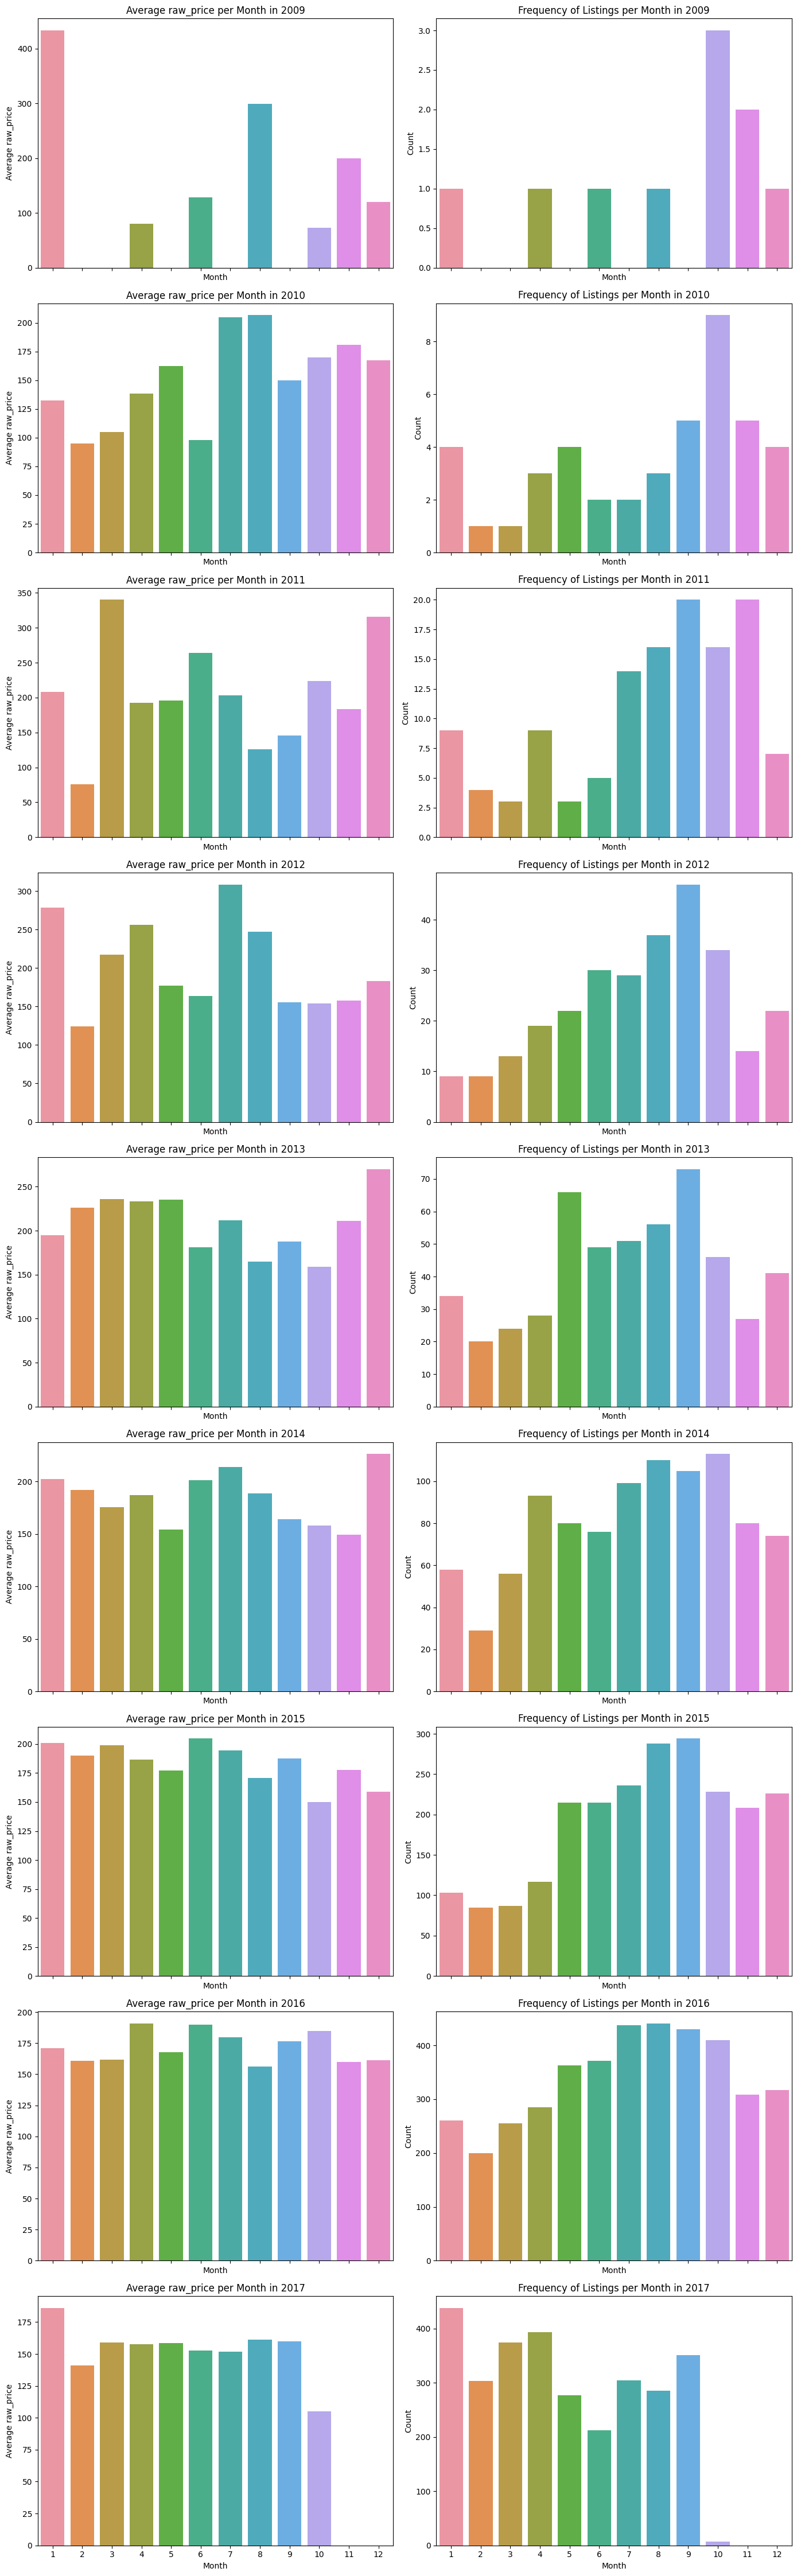

In [ ]:
# Drop rows with missing values for 'year' or 'month' after coercion
df_2 = df_2.dropna(subset=['year', 'month'])

# Ensure 'year' and 'month' are integers for grouping
df_2['year'] = df_2['year'].astype(int)
df_2['month'] = df_2['month'].astype(int)

# Group by year and month and calculate the average price
avg_price_per_year_month = df_2.groupby(['year', 'month'])['raw_price'].mean().unstack()

# Group by year and month and count frequencies
frequency_per_year_month = df_2.groupby(['year', 'month']).size().unstack().fillna(0)

# Plotting
unique_years = sorted(df_2['year'].unique())
num_years = len(unique_years)

# Set up the matplotlib figure
fig, axes = plt.subplots(num_years, 2, figsize=(14, 5 * num_years), sharex='col')

for i, year in enumerate(unique_years):
    # Average Price Plot
    sns.barplot(ax=axes[i, 0], x=avg_price_per_year_month.columns, y=avg_price_per_year_month.loc[year])
    axes[i, 0].set_title(f'Average raw_price per Month in {year}')
    axes[i, 0].set_ylabel('Average raw_price')
    axes[i, 0].set_xlabel('Month')

    # Frequency Plot
    sns.barplot(ax=axes[i, 1], x=frequency_per_year_month.columns, y=frequency_per_year_month.loc[year])
    axes[i, 1].set_title(f'Frequency of Listings per Month in {year}')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_xlabel('Month')

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:
df_2.loc[:, 'distance_to_nearest_university'] = df_2.apply(lambda row: distance_to_nearest_university((row['latitude'], row['longitude']), universities), axis=1).copy()

In [ ]:
df_2['distance_to_nearest_landmark'] = df_2.apply(lambda row: distance_to_nearest_landmark((row['latitude'], row['longitude']), landmarks), axis=1)

# PREPARE YOURSELF

In [ ]:
df2_new = pd.DataFrame({})

# Target Feature
df2_new["log_price"] = df_2.log_price.copy()

# Categorical Features
df2_new["property_type"] = df_2.property_type.copy()
df2_new["room_type"] = df_2.room_type.copy()
df2_new["bed_type"] = df_2.bed_type.copy()
df2_new["cancellation_policy"] = df_2.cancellation_policy.copy()
df2_new["city"] = df_2.city.copy()
df2_new["instant_bookable"] = df_2.instant_bookable.replace({'f': 0, 't': 1})
df2_new["neighbourhood"] = df_2.neighbourhood.copy()
df2_new["zipcode"] = df_2.zipcode.copy()


# Numerical Features
df2_new["accommodates"] = df_2.accommodates.copy()
df2_new["bathrooms"] = df_2.bathrooms.copy()
df2_new["beds"] = df_2.beds.copy()
df2_new["latitude"] = df_2.latitude.copy()
df2_new["longitude"] = df_2.longitude.copy()
df2_new["bedrooms"] = pd.to_numeric(df_2.bedrooms, errors='coerce').fillna(0).astype(int)
df2_new["number_of_reviews"] = pd.to_numeric(df_2['number_of_reviews'], errors='coerce')
df2_new["review_scores_rating"] = pd.to_numeric(df_2['review_scores_rating'], errors='coerce')
df2_new["number_of_reviews"].fillna(0, inplace=True)
df2_new["review_scores_rating"].fillna(df2_new["review_scores_rating"].median(), inplace=True)
df2_new["month"] = df_2.month.copy()
df2_new["year"] = df_2.year.copy()
df2_new["distance_to_nearest_university"] = df_2.distance_to_nearest_university.copy()
df2_new["cleaning_fee"] = df_2.cleaning_fee.astype(int).copy()  # Converting boolean to int
df2_new["distance_to_nearest_landmark"] = df_2['distance_to_nearest_landmark'].copy()

# Drop the row with index 1
df2_new.drop(index=1, inplace=True)

# Reset the index after dropping the row, if needed
df2_new.reset_index(drop=True, inplace=True)


# Display the new DataFrame
df2_new

log_price property_type        room_type  bed_type cancellation_policy  \
0       4.499810     Apartment  Entire home/apt  Real Bed              strict   
1       4.553877     Apartment     Private room  Real Bed              strict   
2       4.174387     Apartment     Private room  Real Bed              strict   
3       4.553877     Apartment  Entire home/apt  Real Bed            moderate   
4       4.828314         House     Private room  Real Bed            moderate   
...          ...           ...              ...       ...                 ...   
11272   5.521461     Apartment  Entire home/apt  Real Bed            moderate   
11273   4.204693         House     Private room  Real Bed            moderate   
11274   4.382027     Apartment     Private room  Real Bed              strict   
11275   4.770685         House  Entire home/apt  Real Bed            flexible   
11276   5.293305     Apartment  Entire home/apt  Real Bed              strict   

         city  instant_bookable       neighbourhood zipcode  accommodates  \
0         NYC                 0             Astoria   11101             2   
1         NYC                 0  Bedford-Stuyvesant   11216             2   
2         NYC                 0     Upper West Side   10025             2   
3          SF                 0            Downtown   94109             2   
4         NYC                 0        Forest Hills   11375             4   
...       ...               ...                 ...     ...           ...   
11272     NYC                 0        East Village   10009             2   
11273  Boston                 0       Jamaica Plain    2130             2   
11274     NYC                 1     Upper West Side   10025             2   
11275      LA                 1     Hollywood Hills   90068             4   
11276      LA                 0       Beverly Hills   90211             2   

       ...   latitude   longitude  bedrooms  number_of_reviews  \
0      ...  40.754641  -73.917554         1                  3   
1      ...  40.680046  -73.940917         1                  2   
2      ...  40.799741  -73.962055         1                 10   
3      ...  37.788189 -122.413427         0                  5   
4      ...  40.723559  -73.839818         1                 91   
...    ...        ...         ...       ...                ...   
11272  ...  40.728747  -73.984344         1                  3   
11273  ...  42.324830  -71.107457         0                  1   
11274  ...  40.802032  -73.966188         1                 11   
11275  ...  34.109001 -118.323494         2                  7   
11276  ...  34.073776 -118.387793         1                  9   

       review_scores_rating  month  year  distance_to_nearest_university  \
0                        93      8  2017                        4.493769   
1                       100      9  2017                        4.468029   
2                        96      1  2017                        5.203057   
3                        80      1  2017                        2.988378   
4                        96      8  2014                        8.213037   
...                     ...    ...   ...                             ...   
11272                    80      9  2016                        0.636941   
11273                   100     10  2017                        2.555013   
11274                    96      8  2017                        5.282861   
11275                    94     10  2015                        6.364938   
11276                    91      4  2016                        3.302818   

       cleaning_fee  distance_to_nearest_landmark  
0                 0                      3.387219  
1                 1                      3.439096  
2                 1                      1.063395  
3                 1                      0.974382  
4                 0                      7.820442  
...             ...                           ...  
11272             0                    

In [ ]:
# Calculate the percentage contribution of each category
def reduce_categories_2(column, threshold=0.05):
    series = pd.value_counts(df2_new[column]) / len(df2_new)
    other_categories = series[series < threshold].index
    reduced_series = df2_new[column].replace(other_categories, 'Other')
    return reduced_series

# Apply the reduction to specific columns
for col in ['property_type', 'bed_type', 'room_type']:
    df2_new[col + '_reduced'] = reduce_categories_2(col)

# Classify zipcodes based on price percentiles
price_by_zipcode = df2_new.groupby('zipcode')['log_price'].mean()
low_threshold = price_by_zipcode.quantile(0.25)
high_threshold = price_by_zipcode.quantile(0.75)

df2_new['zipcode_class'] = df2_new['zipcode'].apply(classify_zipcode)
# Filter out rows where 'bed_type_reduced' is 'super_strict_30' or 'super_strict_60'
df2_new = df2_new[~df2_new['cancellation_policy'].isin(['super_strict_30', 'super_strict_60'])]

# Reset the index if necessary
df2_new.reset_index(drop=True, inplace=True)


In [ ]:
# Encode categorical variables using get_dummies
categorical_cols = ['property_type_reduced', 'room_type_reduced', 'bed_type_reduced', 'cancellation_policy', 'city', 'zipcode_class']
df2_new_encoded = pd.get_dummies(df2_new, columns=categorical_cols)

# Prepare the feature matrix (X) and target vector (y)
X = df2_new_encoded.drop(['log_price', 'neighbourhood','property_type', 'room_type', 'bed_type', 'zipcode'], axis=1)
y = df2_new_encoded['log_price']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5276653604012657, learning_rate=0.11365939737900331, max_depth=3, n_estimators=658, min_child_weight=1, reg_alpha=0.5604418353381775)

# Fit the regressor to the training set
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

Mean Squared Error (MSE): 0.21414325478881213
Root Mean Squared Error (RMSE): 0.4627561504602744
R-squared Score (R2): 0.6530179608854374


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 1000),
    'learning_rate': uniform(0.001, 0.3),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.1, 1),
    'min_child_weight': randint(0, 10),
    'reg_alpha': uniform(0, 1),
}

xgb_reg = XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters and best score (R2)
print("Best parameters found: ", random_search.best_params_)
print("Highest R2 found: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': 0.2632333195121118, 'learning_rate': 0.01789287934180812, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 946, 'reg_alpha': 0.42154507070568936}
Highest R2 found:  0.6491853615181559


In [ ]:
combined_df = pd.concat([df_new_encoded, df2_new_encoded], ignore_index=True)
X = combined_df.drop(['log_price', 'neighbourhood','property_type', 'room_type', 'bed_type', 'zipcode'], axis=1)
y = combined_df['log_price']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.848446130892121, learning_rate=0.05486127720183592, max_depth=7, n_estimators=408, min_child_weight=8, reg_alpha=0.08223414204849067)

# Fit the regressor to the training set
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

# colsample_bytree=0.36215294418109634, learning_rate=0.08180663836552764, max_depth=6, n_estimators=727, min_child_weight=5, reg_alpha=0.91761860123517
# Mean Squared Error (MSE): 0.10459573168519663
# Root Mean Squared Error (RMSE): 0.3234126337748676
# R-squared Score (R2): 0.764449402211114

Mean Squared Error (MSE): 0.10529351921225784
Root Mean Squared Error (RMSE): 0.3244896288207958
R-squared Score (R2): 0.7628779779619527


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 1000),
    'learning_rate': uniform(0.001, 0.3),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.1, 1),
    'min_child_weight': randint(0, 10),
    'reg_alpha': uniform(0, 1),
}

xgb_reg = XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters and best score (R2)
print("Best parameters found: ", random_search.best_params_)
print("Highest R2 found: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'colsample_bytree': 0.9501799328231867, 'learning_rate': 0.021951806524882312, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 901, 'reg_alpha': 0.044751195548894285}
Highest R2 found:  0.7532898657885032
